<a href="https://colab.research.google.com/github/LRO199078/MVP-PUC/blob/main/MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cabeçalho



MVP Análise de Dados e Boas Práticas
Nome: Lucas Roberti de Oliveira

Matrícula:4052025000027

Dataset: Adult Dataset. US Census 1994

# Descrição de problema

O conjunto de dados Adult é um conjunto de dados multivariado que consiste em informações socioeconômicas de adultos americanos (17+). A variável renda foi separada em dois grupos categóricos: >50k ou <=50k. Ou seja pessoas com salário anual maior que 50 mil dólares em um grupo e com salário menor ou igual em outro. O objetivo é entender a influência de variáveis como escolaridade, renda, raça e idade na probabilidade de um indíviduo pertencer ao patamar de renda mais alto. Na sprint de machine learning, poderiamos criar um modelo que agrupa indivíduos nesses dois grupos baseado nas suas demais informações. (Não farei isso neste momento)

# Tipo de problema

Por se tratar de um dataset no qual nós temos pares de entradas e saídas, ou em outras palavras nós conhecemos os valores da variável de interesse (probabilidade 50k+) este é um problema de aprendizado supervisionado.

# Seleção de dados

Assim como o dataset exemplo fornecido do template, o dataset adult já está curado e pronto para uso. Ele está disponível tanto no UCI quanto no kaggle.

# Atributos do dataset:

age(idade em anos completos)

workclass(categoria de ocupação)

fnlwgt (variável que serve para corrigir o peso da sobrerepresentação de determinados grupos na amostra frente a real composição da população)

education (reflete o grau de instrução formal que o sujeito concluiu)

education-num (representação numérica do grau educacional)

marital-status (estado civil)

occupation (profissão do entrevistado)

Relationship (reflete o atual status de relacionamento do sujeito)

race (grupo étinico ao qual a pessoa pertence/ se identifica)

sex (reflete o sexo biológico do sujeito obs: em 1994 a idéia de gênero como conhecemos hoje não era tão difundida)

capital-gain (ganho de capital em dólares durante o último ano)

capital-loss (perda de capital em dólares durante o último ano)

hours-per-week (número de horas semanais trabalhadas em média no último ano)

native-country (país de nascimento do sujeito)

income (variável categórica, diz se o sujeito recebeu mais ou menos do que 50 mil dólares durante o ano de 1994)



# Primeiros passos

Primeiro passo da análise será nomear as colunas e carregar a base de dados. Também imprimir o cabeçalho e contar as observações para confirmar que a base foi corretamente carregada com todas as variáveis esperadas

In [68]:
import pandas as pd
# 1. Define column names (from UCI documentation)
column_headers = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
    ]
# 2. Load data with headers
url = 'https://raw.githubusercontent.com/LRO199078/MVP-PUC/main/adult.data'
df = pd.read_csv(url, header=None, names=column_headers)

    # 3. Verify
print(df.head())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

In [3]:
#counting observations:
total_observations = len(df)
print(f"Total observations: {total_observations}")

Total observations: 32561


# Tratamento de nulos


Os únicos valores que possuem nulos são as variáveis categóricas workclass e ocupation por se tratarem de variáveis categóricas o tratamento de nulos se torna menos importante. Apenas para organização iremos renomear os valores null para "unknown"

In [4]:
# Replace '?' with 'Unknown' in specific categorical columns
df[['occupation', 'workclass']] = df[['occupation', 'workclass']].replace('?', 'Unknown')

# 1- Idade

O primeiro atributo deste data set que iremos analisar é a idade. Ela é única variável originalmente numérica dentre as nossas variáveis analisadas. Seria a idade um atributo que explica a probabilidade de um indivíduo ter alta renda?
om o passar dos anos e o acúmulo de experiência, um proissional se desenvolve na sua profissão e tem oportunidades de promoção dentro da sua empresa ou de juntar dinheiro para investir no seu negócio, em caso de profissionais autonomos É esperado que a idade tenha grande influência na renda de um indivíduo. Além de efeitos indiretos como a possibilidade de acumular capital ou de concluir os estudos (o que faz com que a renda aumente por efeitos de outros atributos)

Os próximos gráficos e análises tem o objetivo de obter insights na correlação entre esses dois atributos.

38.58164675532078


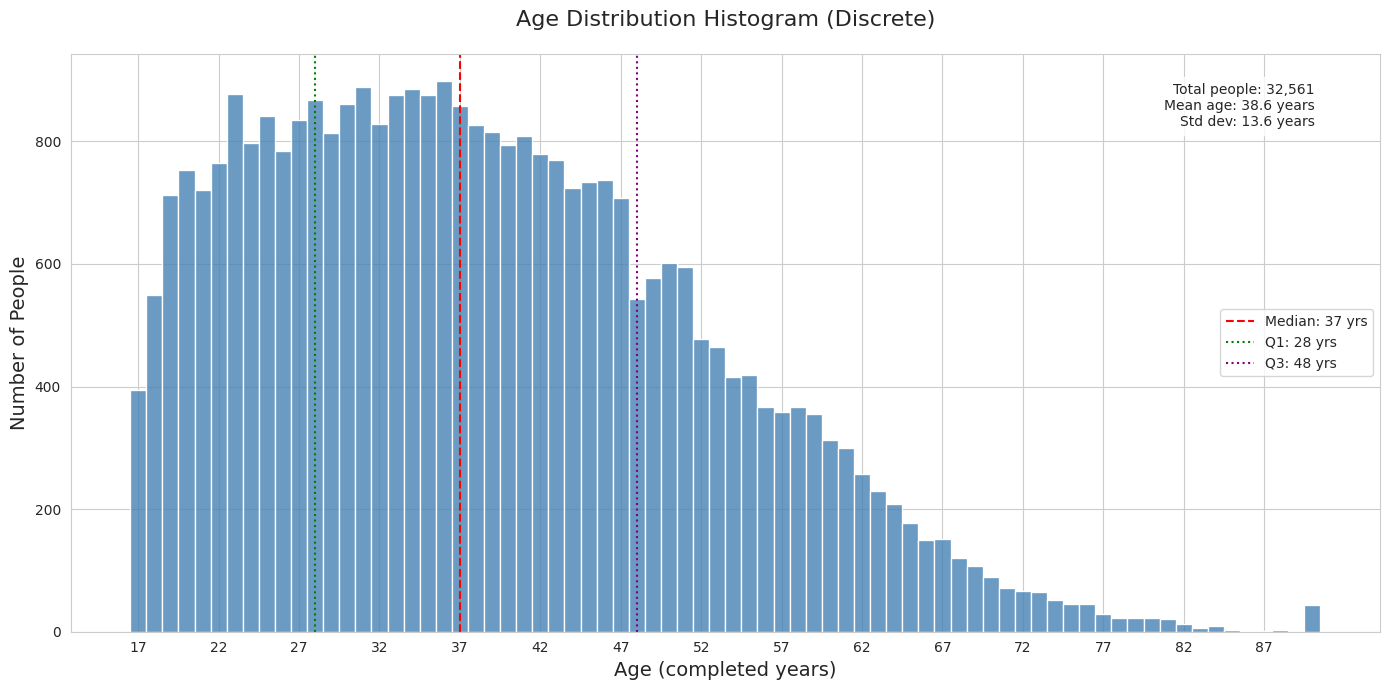

In [5]:
# Calculate mean age (simple version)
average_age = df['age'].mean()
print(average_age)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

# Create histogram with count bars
ax = sns.histplot(data=df, x='age', discrete=True,
                 binwidth=1, color='steelblue',
                 alpha=0.8, stat='count')

# Add median and quartiles
median_age = df['age'].median()
q25 = df['age'].quantile(0.25)
q75 = df['age'].quantile(0.75)

plt.axvline(median_age, color='red', linestyle='--', linewidth=1.5, label=f'Median: {median_age:.0f} yrs')
plt.axvline(q25, color='green', linestyle=':', linewidth=1.5, label=f'Q1: {q25:.0f} yrs')
plt.axvline(q75, color='purple', linestyle=':', linewidth=1.5, label=f'Q3: {q75:.0f} yrs')

# Customize plot
plt.title('Age Distribution Histogram (Discrete)', fontsize=16, pad=20)
plt.xlabel('Age (completed years)', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.xticks(range(int(df['age'].min()), int(df['age'].max())+1, 5))  # Show every 5 years

# Add text annotation for stats
stats_text = f"""Total people: {len(df):,}
Mean age: {df['age'].mean():.1f} years
Std dev: {df['age'].std():.1f} years"""
plt.text(0.95, 0.95, stats_text,
         transform=ax.transAxes,
         ha='right', va='top',
         bbox=dict(facecolor='white', alpha=0.8))

plt.legend()
plt.tight_layout()
plt.show()

 Acima, temos um historgrama onde o eixo x é a idade de um indivíduo e o eixo y reflete a quantidade de vezes que aquele valor de idade aparece na amostra. O valor mais presente na amostra (moda) é de 36 anos.  No gráfico também é possível ver a mediana (37 anos) e os 4 quartís da distribuição. Assumindo que essa distribuição etária é próxima o suficiente da real distribuição da população, irei ignorar ajustes de peso e irei definir quatro grupos etários baseados nos quartis enxergados no gráfico: q1 será de 17 a 28 anos, grupo 2 de 29 a 37 anos, grupo 3 de 38 a 48 anos e grupo 4 >=49 anos

In [6]:
import numpy as np

# Calculate quartiles
q1, q2, q3 = df['age'].quantile([0.25, 0.5, 0.75])

# Create bins with slight adjustment for edge cases
bins = [-np.inf, q1, q2, q3, np.inf]
labels = [
    f'Q1 (≤{int(q1)}yrs)',
    f'Q2 ({int(q1)+1}-{int(q2)}yrs)',
    f'Q3 ({int(q2)+1}-{int(q3)}yrs)',
    f'Q4 (>{int(q3)}yrs)'
]

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

Abaixo, podemos ver o número de observações da amostra em cada grupo etário

In [7]:
age_group_counts = df['age_group'].value_counts().sort_index()
print("Number of people per age group:")
print(age_group_counts)

Number of people per age group:
age_group
Q1 (≤28yrs)      8898
Q2 (29-37yrs)    7783
Q3 (38-48yrs)    8241
Q4 (>48yrs)      7639
Name: count, dtype: int64


Por ser uma variável discreta (idade em anos completos, arredondado para baixo) temos o problema dos tamanhos de grupo serem ligeiramente diferente. Mas creio que essa diferença não irá impactar na análise proposta.

In [8]:
# First ensure income column is clean (remove whitespace)
df['income'] = df['income'].str.strip()

# Calculate probabilities
income_prob = df.groupby('age_group')['income'].apply(
    lambda x: (x == '>50K').mean()  # Probability of >50K
).sort_index()

print("\nProbability of earning >50K by age group:")
print(income_prob)


Probability of earning >50K by age group:
age_group
Q1 (≤28yrs)      0.042369
Q2 (29-37yrs)    0.241938
Q3 (38-48yrs)    0.365975
Q4 (>48yrs)      0.335777
Name: income, dtype: float64


/tmp/ipython-input-8-4065354095.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_prob = df.groupby('age_group')['income'].apply(


In [9]:
summary = pd.DataFrame({
    'Count': age_group_counts,
    'P(>50K)': income_prob,
    '>50K Count': df.groupby('age_group')['income'].apply(lambda x: (x == '>50K').sum())
})

print("\nComplete Summary:")
print(summary)


Complete Summary:
               Count   P(>50K)  >50K Count
age_group                                 
Q1 (≤28yrs)     8898  0.042369         377
Q2 (29-37yrs)   7783  0.241938        1883
Q3 (38-48yrs)   8241  0.365975        3016
Q4 (>48yrs)     7639  0.335777        2565


/tmp/ipython-input-9-114362190.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  '>50K Count': df.groupby('age_group')['income'].apply(lambda x: (x == '>50K').sum())


Acima temos uma tabela com a probabilidade de um indivíduo estar no grupo de renda >=50k dentro de cada grupo etário. Abaixo temos um gráfico que nos permite visualizar melhor os dados

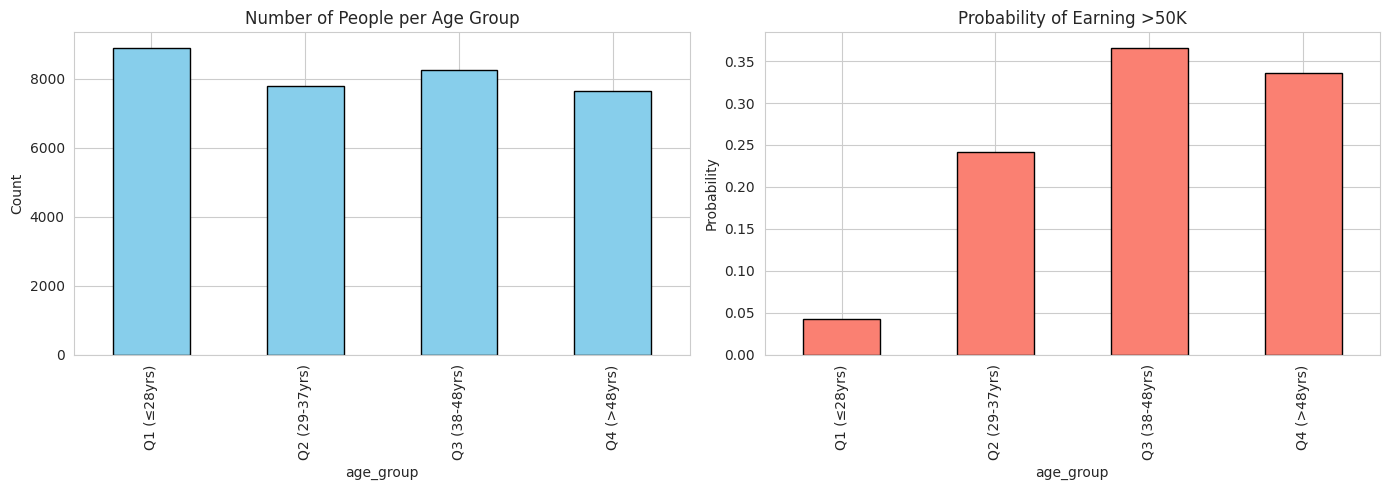

In [10]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
age_group_counts.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Number of People per Age Group')
ax1.set_ylabel('Count')

# Probability plot
income_prob.plot(kind='bar', ax=ax2, color='salmon', edgecolor='black')
ax2.set_title('Probability of Earning >50K')
ax2.set_ylabel('Probability')

plt.tight_layout()
plt.show()

Acima, temos dois gráficos. O primeiro está mostrando o número de ocorrências por grupo etário e o segundo a probabilidade de income >=50k por grupo etário.  É possível ver que a probabilidade aumenta de 4,2% para 24% no segundo grupo atingindo o pico de 36,5% no grupo 3 e caindo para 33% no grupo 4. Confirmando a intuição de que a idade está diretamente relacionada com a renda.

# 2- Raça e Gênero:

A seguir será analisado o perfil destes grupos etários mas segregado por raça. E depois por gênero. E por fim uma análise por subgrupo raça e gênero. A princípio o foco da análise racioal será a diferença entre negros e brancos. Portanto apenas 4 subgrupos serão analisados : mulheres negras:(black female); homens brancos (white Male), mulheres brancas (white female) e homens negros (black male) o Objetivo é ver se a probabilidade de income >50k difere significativamente entre os grupos

## 2.1 Raça

/tmp/ipython-input-11-2521064607.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby('age_group')['income'].apply(
/tmp/ipython-input-11-2521064607.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comparison['White Count'] = white_df.groupby('age_group').size()
/tmp/ipython-input-11-2521064607.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comparison['Black Count'] = black_df.groupby('age_gro

Income Probability Comparison:
                  White     Black  Difference (White-Black)  \
age_group                                                     
Q1 (≤28yrs)    0.043876  0.026316                  0.017560   
Q2 (29-37yrs)  0.259966  0.109554                  0.150412   
Q3 (38-48yrs)  0.386844  0.206522                  0.180322   
Q4 (>48yrs)    0.353283  0.167975                  0.185308   

               Ratio (White/Black)  White Count  Black Count  
age_group                                                     
Q1 (≤28yrs)               1.667285         7544          874  
Q2 (29-37yrs)             2.372949         6547          785  
Q3 (38-48yrs)             1.873137         7008          828  
Q4 (>48yrs)               2.103188         6717          637  


<Figure size 1200x600 with 0 Axes>

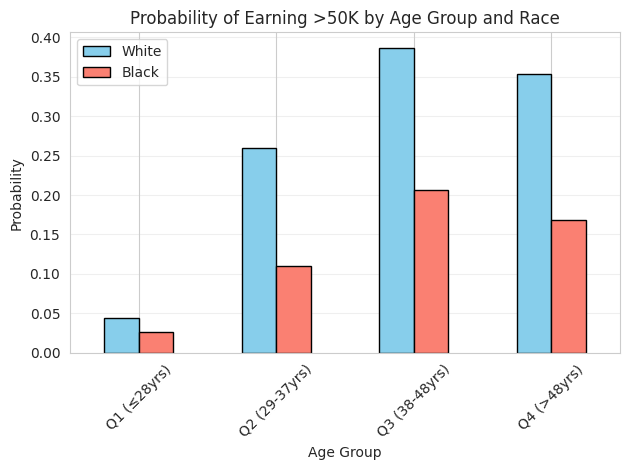

In [11]:
# 1. Clean and prepare the data
df['race'] = df['race'].str.strip()  # Remove any whitespace
df['income'] = df['income'].str.strip()

# 2. Filter for White and Black populations
white_df = df[df['race'] == 'White']
black_df = df[df['race'] == 'Black']

# 3. Calculate probabilities by age group for each race
def calculate_income_prob(df):
    return df.groupby('age_group')['income'].apply(
        lambda x: (x == '>50K').mean()
    ).rename('P(>50K)')

white_prob = calculate_income_prob(white_df)
black_prob = calculate_income_prob(black_df)

# 4. Combine results for comparison
comparison = pd.DataFrame({
    'White': white_prob,
    'Black': black_prob,
    'Difference (White-Black)': white_prob - black_prob,
    'Ratio (White/Black)': white_prob / black_prob
})

# 5. Add count information
comparison['White Count'] = white_df.groupby('age_group').size()
comparison['Black Count'] = black_df.groupby('age_group').size()

print("Income Probability Comparison:")
print(comparison)

# 6. Visualization
plt.figure(figsize=(12, 6))

# Probability comparison bar plot
comparison[['White', 'Black']].plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Probability of Earning >50K by Age Group and Race')
plt.ylabel('Probability')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)



plt.tight_layout()
plt.show()

Podemos ver no gráfico aque a diferença está presente em todos os grupos etários. Entre os mais jovens, 66% mais provavel que uma pessoa branca esteja entre o grupo 50k+ dp que uma pessoa negra, essa diferença aumenta pra 136% mais provavel no grupo 2 , 86% mais provavel no grupo 3 e 110% mais provavel no grupo 4. Veremos abaixo que todos os resultados são estatísticamente significantes

In [12]:
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact
import pandas as pd

Calculando a significância estatística dos resultados:

In [13]:
from scipy.stats import fisher_exact
import pandas as pd

# Calculate probabilities and statistical significance
def calculate_significance(df_white, df_black):
    results = []
    for age_group in df['age_group'].unique():
        # Filter data
        white_group = df_white[df_white['age_group'] == age_group]
        black_group = df_black[df_black['age_group'] == age_group]

        # Create contingency table
        table = [
            [(white_group['income'] == '>50K').sum(), (white_group['income'] == '<=50K').sum()],
            [(black_group['income'] == '>50K').sum(), (black_group['income'] == '<=50K').sum()]
        ]

        # Fisher's exact test
        _, p_value = fisher_exact(table)

        results.append({
            'Age Group': age_group,
            'White (>50K)': table[0][0],
            'White Total': len(white_group),
            'Black (>50K)': table[1][0],
            'Black Total': len(black_group),
            'P(>50K) White': table[0][0]/len(white_group) if len(white_group) > 0 else 0,
            'P(>50K) Black': table[1][0]/len(black_group) if len(black_group) > 0 else 0,
            'p-value': p_value
        })

    return pd.DataFrame(results)

# Run analysis
results_df = calculate_significance(white_df, black_df)

In [14]:
from IPython.display import display, HTML

# Formatting
styled_df = (results_df.style
    .format({
        'P(>50K) White': '{:.1%}',
        'P(>50K) Black': '{:.1%}',
        'p-value': '{:.4f}'
    })
    .apply(lambda x: ['background: lightyellow' if x.name == 'p-value' else '' for i in x], axis=1)
    .bar(subset=['P(>50K) White', 'P(>50K) Black'], color='lightblue')
    .set_caption('Income Disparity Analysis by Age Group and Race'))

display(styled_df)

,Age Group,White (>50K),White Total,Black (>50K),Black Total,P(>50K) White,P(>50K) Black,p-value
0,Q3 (38-48yrs),2711,7008,171,828,38.7%,20.7%,0.0000
1,Q4 (>48yrs),2373,6717,107,637,35.3%,16.8%,0.0000
2,Q1 (≤28yrs),331,7544,23,874,4.4%,2.6%,0.0125
3,Q2 (29-37yrs),1702,6547,86,785,26.0%,11.0%,0.0000


Podemos ver acima que todos os resultados são relevantes estatísticamente (p-valor menor que 0,05) mas os resultados pro grupos 2 a 4 são mais relevantes estatísticamente Uma forma de interpretar é: a chance de existir uma diferença real na renda de negros e brancos é de 98,75% para o grupo de idade 1 (p-valor 0,0125) o que é um, resultado bastante assertivo. Mas a chance para os demais grupos é maior que 99,99% (p-valor não aparece nas primeira 4 casas decimais)

###Conclusão

Podemos concluir que raça é uma variável relevante para renda em todos os grupos etários analisados.

##2.2 Gênero:

/tmp/ipython-input-15-2034657275.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby('age_group')['income'].apply(
/tmp/ipython-input-15-2034657275.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_comparison['Men Count'] = men_df.groupby('age_group').size()
/tmp/ipython-input-15-2034657275.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_comparison['Women Count'] = women_df.groupb

,Men,Women,Difference (Men-Women),Ratio (Men/Women),Men Count,Women Count,p-value
age_group,,,,,,,
Q1 (≤28yrs),5.4%,2.6%,2.8%,2.1,5183,3715,0.0000
Q2 (29-37yrs),28.7%,13.9%,14.8%,2.1,5428,2355,0.0000
Q3 (38-48yrs),44.5%,18.2%,26.3%,2.4,5759,2482,0.0000
Q4 (>48yrs),41.7%,13.7%,28.1%,3.1,5420,2219,0.0000


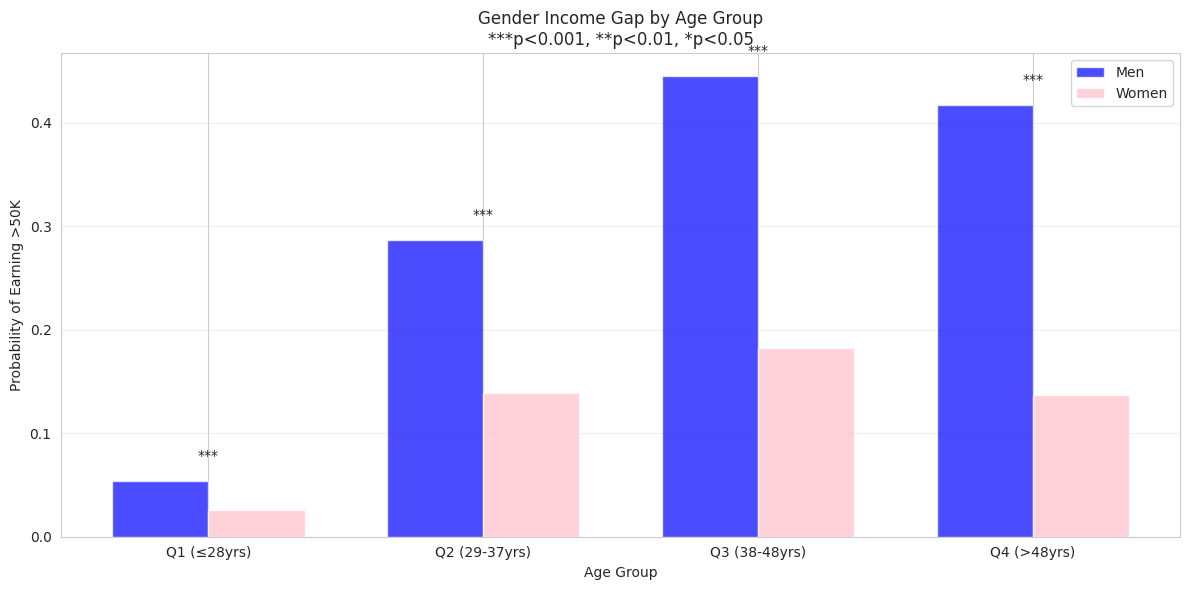

In [15]:
# 1. Clean and prepare the data
df['sex'] = df['sex'].str.strip()
df['income'] = df['income'].str.strip()

# 2. Filter for Men and Women
men_df = df[df['sex'] == 'Male']
women_df = df[df['sex'] == 'Female']

# 3. Calculate probabilities by age group for each gender
def calculate_income_prob(df):
    return df.groupby('age_group')['income'].apply(
        lambda x: (x == '>50K').mean()
    ).rename('P(>50K)')

men_prob = calculate_income_prob(men_df)
women_prob = calculate_income_prob(women_df)

# 4. Combine results for comparison
gender_comparison = pd.DataFrame({
    'Men': men_prob,
    'Women': women_prob,
    'Difference (Men-Women)': men_prob - women_prob,
    'Ratio (Men/Women)': men_prob / women_prob
})

# 5. Add count information
gender_comparison['Men Count'] = men_df.groupby('age_group').size()
gender_comparison['Women Count'] = women_df.groupby('age_group').size()

# 6. Calculate p-values using Fisher's Exact Test
from scipy.stats import fisher_exact

p_values = []
for age_group in gender_comparison.index:
    # Create contingency table
    men_high = ((men_df['age_group'] == age_group) & (men_df['income'] == '>50K')).sum()
    men_low = ((men_df['age_group'] == age_group) & (men_df['income'] == '<=50K')).sum()
    women_high = ((women_df['age_group'] == age_group) & (women_df['income'] == '>50K')).sum()
    women_low = ((women_df['age_group'] == age_group) & (women_df['income'] == '<=50K')).sum()

    _, p_value = fisher_exact([[men_high, men_low], [women_high, women_low]])
    p_values.append(p_value)

gender_comparison['p-value'] = p_values

# 7. Format the table for display
styled_gender_table = (gender_comparison.style
    .format({
        'Men': '{:.1%}',
        'Women': '{:.1%}',
        'Difference (Men-Women)': '{:.1%}',
        'Ratio (Men/Women)': '{:.1f}',
        'p-value': '{:.4f}'
    })
    .apply(lambda x: ['background: lightyellow' if x.name == 'p-value' else '' for i in x], axis=1)
    .bar(subset=['Men', 'Women'], color='lightblue')
    .set_caption('Gender Income Gap by Age Group (>50K Probability)'))

# 8. Create visualization
plt.figure(figsize=(12, 6))
width = 0.35
x = range(len(gender_comparison))

plt.bar(x, gender_comparison['Men'], width, label='Men', color='blue', alpha=0.7)
plt.bar([i + width for i in x], gender_comparison['Women'], width, label='Women', color='pink', alpha=0.7)

# Add significance markers
for i, pval in enumerate(gender_comparison['p-value']):
    y_pos = max(gender_comparison.loc[gender_comparison.index[i], ['Men', 'Women']]) + 0.02
    if pval < 0.001:
        plt.text(i + width/2, y_pos, '***', ha='center')
    elif pval < 0.01:
        plt.text(i + width/2, y_pos, '**', ha='center')
    elif pval < 0.05:
        plt.text(i + width/2, y_pos, '*', ha='center')

# Formatting
plt.xticks([i + width/2 for i in x], gender_comparison.index)
plt.ylabel('Probability of Earning >50K')
plt.xlabel('Age Group')
plt.title('Gender Income Gap by Age Group\n***p<0.001, **p<0.01, *p<0.05')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Display results
display(styled_gender_table)
plt.show()

Ao observar a tabela e o gráfico acima, é possível observar a diferença de renda em todos os grupos etários entre homens e mulheres no grupo 1 a diferença é de 107% no q1, 106% no q2, 144% no q3 e 204% no q4.  Podemos observar que todos os resultados são estatísticamente relevantes a 99% de significância (p-valor menos que 0,001 para todos os grupos)

Verificando evidência da diminuição do gap de gênero

A análise anterior sugere que houve uma redução do gap de gênero, conforme mencionado. Mas para confirmar que esta redução de fato existe e não é apenas um ruído dos dados, é preciso fazer uma análise de diferenças em diferenças (DiD) para comprovar a roubustez da diferença.
O teste irá testar as seguintes hipóteses:

H0: As penalidades de gênero de q1 e q2 = q3 e q4
H1: A penalidade de gênero de q1 e q2 é menor do que q3 e q4

Caso o p-valor do teste seja menor que 0,05 é possível rejeitar H0 logo dizer que há 95% de chance ou mais de que exista uma diferença real no gap de gênero.
Caso o p-valor seja maior do que 0,05, significa que existe uma chance considerável (>5%) que a diferença observada seja apenas ruído estatístico. O que não significa que o gap de gênero não tenha diminuído mas significa que os dados não apresentam evidências suficientes para afirmar a diminuição.

Para evitar efeitos de variáveis cruzadas como o nível de educação e a profissão será inserido no código controles para estas variáveis


                            OLS Regression Results                            
Dep. Variable:            high_income   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     377.2
Date:                Sun, 06 Jul 2025   Prob (F-statistic):               0.00
Time:                        22:41:18   Log-Likelihood:                -13848.
No. Observations:               32561   AIC:                         2.776e+04
Df Residuals:                   32528   BIC:                         2.804e+04
Df Model:                          32                                         
Covariance Type:                  HC1                                         
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

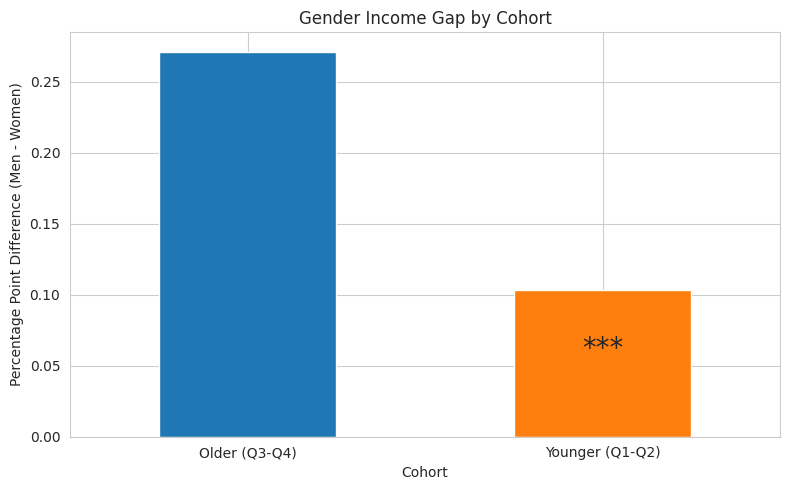

In [16]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# 1. Prepare the data
df['high_income'] = (df['income'] == '>50K').astype(int)
df['is_young_cohort'] = df['age_group'].isin(['Q1 (≤28yrs)', 'Q2 (29-37yrs)']).astype(int)  # Treatment group
df['is_male'] = (df['sex'] == 'Male').astype(int)

# Ensure 'sex' column is clean before grouping
df['sex'] = df['sex'].str.strip()


# 2. DiD Model (with robust SE)
model = smf.ols(
    '''high_income ~ is_male + is_young_cohort + is_male*is_young_cohort
    + C(occupation, Treatment(' Prof-specialty'))
    + C(education, Treatment(' HS-grad'))''',
    data=df
).fit(cov_type='HC1')

print(model.summary())

# 3. Extract Key Results
did_coef = model.params['is_male:is_young_cohort']
p_value = model.pvalues['is_male:is_young_cohort']

print(f"\nDiD Estimate: {did_coef:.4f} (p-value: {p_value:.4f})")
if p_value < 0.05:
    direction = "narrower" if did_coef < 0 else "wider"
    print(f"Significant evidence that gender gap is {direction} in Q1-Q2 vs Q3-Q4")
else:
    print("No significant difference in gender gap between cohorts")

# 4. Visualization
cohort_gaps = df.groupby(['is_young_cohort', 'sex'])['high_income'].mean().unstack()
cohort_gaps['gap'] = cohort_gaps['Male'] - cohort_gaps['Female']

plt.figure(figsize=(8, 5))
colors = ['#1f77b4', '#ff7f0e']
cohort_gaps['gap'].plot(
    kind='bar',
    color=colors,
    title='Gender Income Gap by Cohort',
    ylabel='Percentage Point Difference (Men - Women)',
    xlabel='Cohort',
    rot=0
)
plt.xticks([0, 1], ['Older (Q3-Q4)', 'Younger (Q1-Q2)'], ha='center')
plt.axhline(0, color='black', linewidth=0.5)

# Add significance marker
if p_value < 0.05:
    star = '*' * sum(p_value < cutoff for cutoff in [0.05, 0.01, 0.001])
    plt.text(1, cohort_gaps.loc[1, 'gap']/2, star,
             ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()

Como podemos observar no gráfico, ra redução do gap de gênero em 13 pp é relevante estatísticamente a 99% de significância (pvalor <0,01) na verdade o p-valor não aparece até a quarta casa decimal o que torna o resultado bem robusto.

---



### Conclusão

Podemos observar que gênero é um fator relevante em todos os grupos etários analisados. O efeito  é significantemente reduzido para as gerações mais novas o que pode representar as mudanças culturais que a sociedade americana passou sobretudo nas décadas de 70 e 80 com a ascensão de movimentos feministas. Porém o gap de gênero continua existindo. O que implica a necessidade de avanços nas políticas públicas de equidade de gênero. (Apesar da análise ser nos EUA de 1994, isso é válido para o Brasil de 2025, mas isso é assunto para um outro momento)

## 2.3 Subgrupos Gênero e Raça

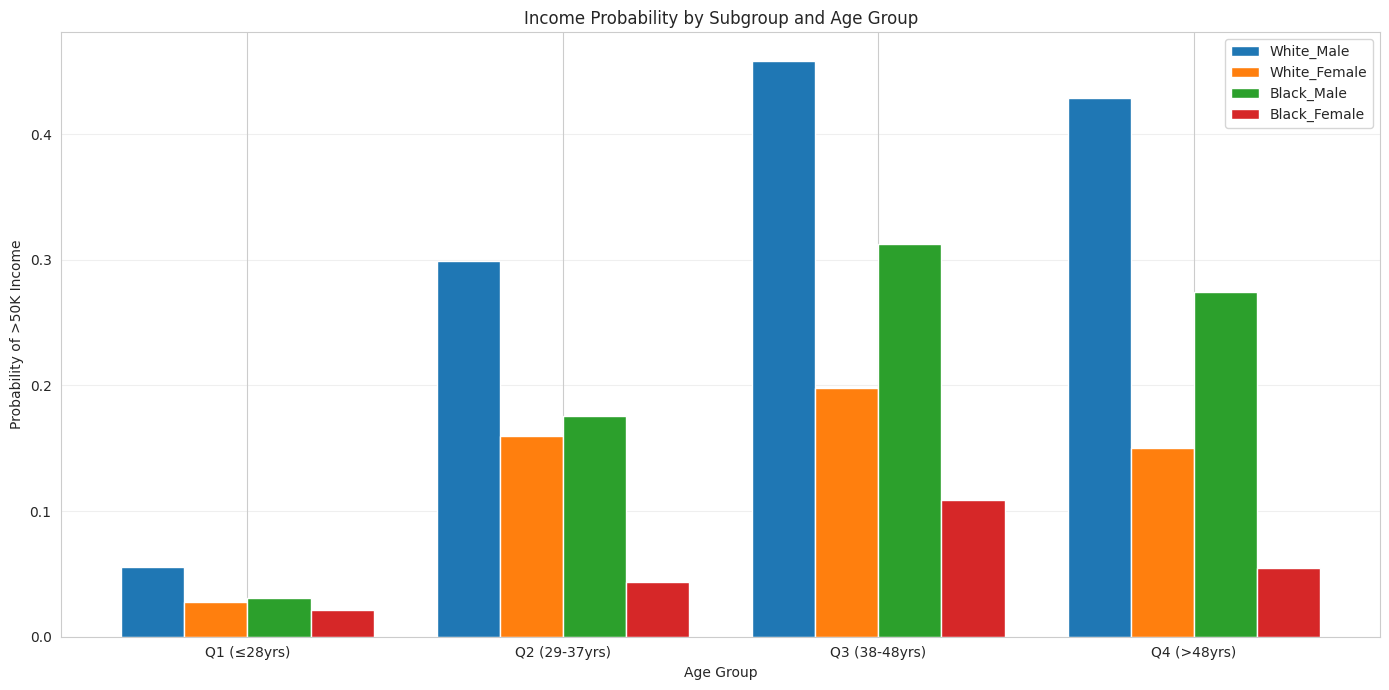

In [17]:
# 1. Prepare subgroups
df['subgroup'] = df['race'].str.strip() + "_" + df['sex'].str.strip()
subgroups = ['White_Male', 'White_Female', 'Black_Male', 'Black_Female']

# 2. Calculate probability of >50K by age group for each subgroup
results = []
for age_group in df['age_group'].unique():
    for subgroup in subgroups:
        subgroup_df = df[(df['age_group'] == age_group) & (df['subgroup'] == subgroup)]
        n = len(subgroup_df)
        n_high = (subgroup_df['income'] == '>50K').sum()
        prob = n_high / n if n > 0 else np.nan

        results.append({
            'Age Group': age_group,
            'Subgroup': subgroup,
            'Probability': prob,
            'Count': n,
            'High_Income_Count': n_high
        })

results_df = pd.DataFrame(results)

# 3. Pivot for DiD analysis
pivot_df = results_df.pivot(index='Age Group', columns='Subgroup', values=['Probability', 'Count'])

# 4. Calculate Difference-in-Differences
def calculate_did(row):
    white_gap = row[('Probability', 'White_Male')] - row[('Probability', 'White_Female')]
    black_gap = row[('Probability', 'Black_Male')] - row[('Probability', 'Black_Female')]
    return black_gap - white_gap

pivot_df[('Difference', 'DiD')] = pivot_df.apply(calculate_did, axis=1)

# 5. Format output table
styled_table = (pivot_df.style
    .format({
        ('Probability', 'White_Male'): '{:.1%}',
        ('Probability', 'White_Female'): '{:.1%}',
        ('Probability', 'Black_Male'): '{:.1%}',
        ('Probability', 'Black_Female'): '{:.1%}',
        ('Difference', 'DiD'): '{:.3f}'
    })
    .background_gradient(subset=[('Difference', 'DiD')], cmap='RdBu')
    .set_caption('Difference-in-Differences Analysis of Income Probability (>50K)'))

# 6. Visualization
plt.figure(figsize=(14, 7))
width = 0.2
x = np.arange(len(pivot_df.index))

for i, subgroup in enumerate(subgroups):
    plt.bar(x + i*width, pivot_df[('Probability', subgroup)], width, label=subgroup)

plt.xticks(x + width*1.5, pivot_df.index)
plt.ylabel('Probability of >50K Income')
plt.xlabel('Age Group')
plt.title('Income Probability by Subgroup and Age Group')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# 7. Display results
display(styled_table)
plt.show()

No gráfico acima é possível observar a probabilidade de income >=50k pra cada grupo étinico em cada etapa da vida. Como esperado a curva etária continua sendo relevante com o pico de renda no grupo 3 mas o nível difere significativamente para cada grupo. A probabilidade é maior para homens brancos em todas as faixas, em segundo lugar vem o grupo de homens negros, seguido por mulheres brancas e no fim, mulheres negras. O próximo passo é fazer uma análise de Difference in difference para verificar a existência de um efeito multiplicativo entre os dois vieses (gênero e raça). Caso o valor de DiD seja positivo significa que a penalidade de ser uma mulher negra tem um efeito maior do que a soma da penalidade de racial e de gênero. Ou seja existe um componente de penalização que é específico da combinação.

In [18]:
# 1. Calculate race gaps within each gender
def calculate_race_gap(df, gender):
    gender_df = df[df['sex'] == gender]
    white_prob = gender_df[gender_df['race'] == 'White'].groupby('age_group')['income'].apply(
        lambda x: (x == '>50K').mean()
    )
    black_prob = gender_df[gender_df['race'] == 'Black'].groupby('age_group')['income'].apply(
        lambda x: (x == '>50K').mean()
    )
    return white_prob - black_prob

race_gap_men = calculate_race_gap(df, 'Male')
race_gap_women = calculate_race_gap(df, 'Female')

# 2. Difference-in-Differences (Race Gap for Women vs Men)
did_race_gap = race_gap_women - race_gap_men

# 3. Combine results
results = pd.DataFrame({
    'Race Gap (Men)': race_gap_men,
    'Race Gap (Women)': race_gap_women,
    'DiD (Women-Men)': did_race_gap
})

# 4. Add statistical significance
from scipy.stats import fisher_exact

p_values = []
for age_group in results.index:
    # Men contingency table
    men_white = len(df[(df['age_group'] == age_group) & (df['sex'] == 'Male') & (df['race'] == 'White') & (df['income'] == '>50K')])
    men_black = len(df[(df['age_group'] == age_group) & (df['sex'] == 'Male') & (df['race'] == 'Black') & (df['income'] == '>50K')])

    # Women contingency table
    women_white = len(df[(df['age_group'] == age_group) & (df['sex'] == 'Female') & (df['race'] == 'White') & (df['income'] == '>50K')])
    women_black = len(df[(df['age_group'] == age_group) & (df['sex'] == 'Female') & (df['race'] == 'Black') & (df['income'] == '>50K')])

    _, pval = fisher_exact([[men_white, men_black], [women_white, women_black]])
    p_values.append(pval)

results['p-value'] = p_values

# 5. Format and display
styled_results = (results.style
    .format({
        'Race Gap (Men)': '{:.3f}',
        'Race Gap (Women)': '{:.3f}',
        'DiD (Women-Men)': '{:.3f}',
        'p-value': '{:.4f}'
    })
    .background_gradient(subset=['DiD (Women-Men)'], cmap='RdBu')
    .set_caption('Is the Race Gap Larger for Women? (White-Black Income Probability Difference)'))

styled_results

/tmp/ipython-input-18-4216786767.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  white_prob = gender_df[gender_df['race'] == 'White'].groupby('age_group')['income'].apply(
/tmp/ipython-input-18-4216786767.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  black_prob = gender_df[gender_df['race'] == 'Black'].groupby('age_group')['income'].apply(


,Race Gap (Men),Race Gap (Women),DiD (Women-Men),p-value
age_group,,,,
Q1 (≤28yrs),0.024,0.006,-0.018,0.1492
Q2 (29-37yrs),0.123,0.116,-0.007,0.5570
Q3 (38-48yrs),0.146,0.089,-0.057,0.0000
Q4 (>48yrs),0.155,0.096,-0.059,0.1695


Podemos observar que a análise de DID não apresentou evidência de viés duplo. Os resultados foram todos negativos mas sem relavância estatística exceto para o grupo 3. Em que o valor negativo é relavante estatísticamente. Uma forma de interepetar reste resultado é: Mulheres negras são o subgrupo com menor acesso a renda e as políticas públicas devem contemplar estes grupos. Mas este viés se dá pelo fato delas pertecerem a dois grupos minoritários e não devido a um preconceito específico contra o subgrupo. Outra forma de interpretar é pensando que homens brancos possuem na verdade uma vantagem dupla a vantagem de ser um homem branco pode ser explicado por 3 fatores: 1 viés racial, um viés de gênero e um terceiro componente que seria um viés multiplicativo por ser um homem branco. Históricamente, os homens brancos compõem a maioria das pessoas em posições relevantes como alto funcionalismo público. Em 1994, o ano da análise, todos os presidentes americanos pertenciam ao subgrupo.

### Conclusão

Tanto raça quanto gênero são fatores relevantes para explicar a renda de um indivíduo. É necessário pensar em políticas públicas para mitigar ambas as desigualdades

# 3. Educação

Entendo como funciona o education_num

In [19]:
# Get the unique education levels and their corresponding education-num values
education_mapping = df[['education', 'education-num']].drop_duplicates().sort_values('education-num')

# Display the mapping
print(education_mapping.to_string(index=False))

    education  education-num
    Preschool              1
      1st-4th              2
      5th-6th              3
      7th-8th              4
          9th              5
         10th              6
         11th              7
         12th              8
      HS-grad              9
 Some-college             10
    Assoc-voc             11
   Assoc-acdm             12
    Bachelors             13
      Masters             14
  Prof-school             15
    Doctorate             16


/tmp/ipython-input-20-52005260.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(
/tmp/ipython-input-20-52005260.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right')


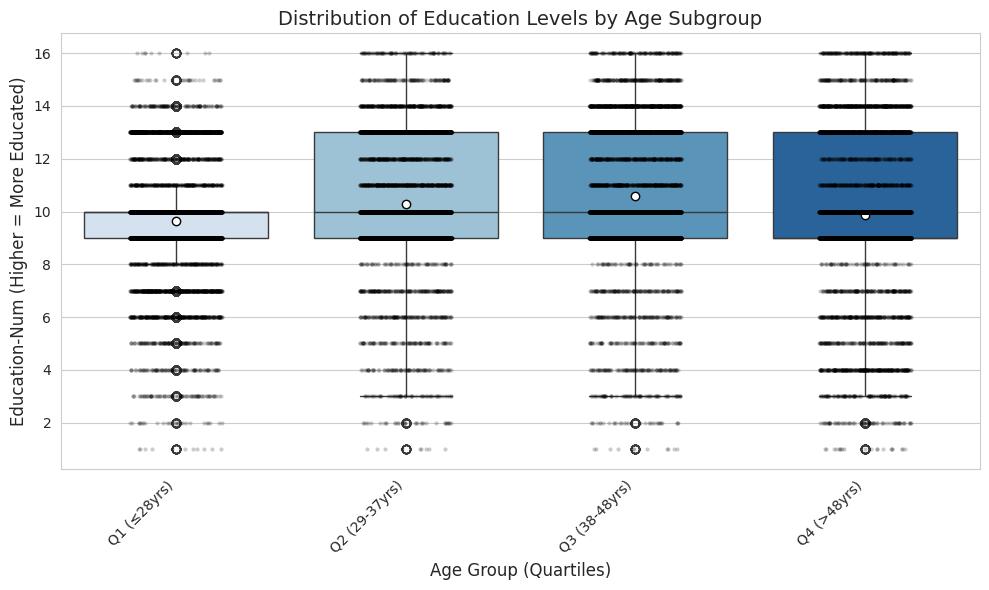

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create boxplot
boxplot = sns.boxplot(
    data=df,
    x='age_group',
    y='education-num',
    palette="Blues",
    showmeans=True,  # Show mean markers
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"}
)

# Add titles/labels
plt.title("Distribution of Education Levels by Age Subgroup", fontsize=14)
plt.xlabel("Age Group (Quartiles)", fontsize=12)
plt.ylabel("Education-Num (Higher = More Educated)", fontsize=12)

# Rotate x-labels for readability
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right')

# Add data points with slight jitter to show density
sns.stripplot(
    data=df,
    x='age_group',
    y='education-num',
    color="black",
    alpha=0.2,
    jitter=0.2,
    size=3
)

plt.tight_layout()
plt.show()


Podemos observar que a ocorrência de valores de edu mais altos são menos prevalentes no grupo 1 e mais prevalentes no grupo 3. O que acompanha os níveis de renda o que sugere algum gráu de correlação. Mas a variação não se dá no mesmo grau de magnitude ( a mediana do grupo 4 é muito próxima do 1, apesar de a probabilidade de ambos estarem no income >=50k é muito distinta)



## 3.1 Influência direta da educação na renda

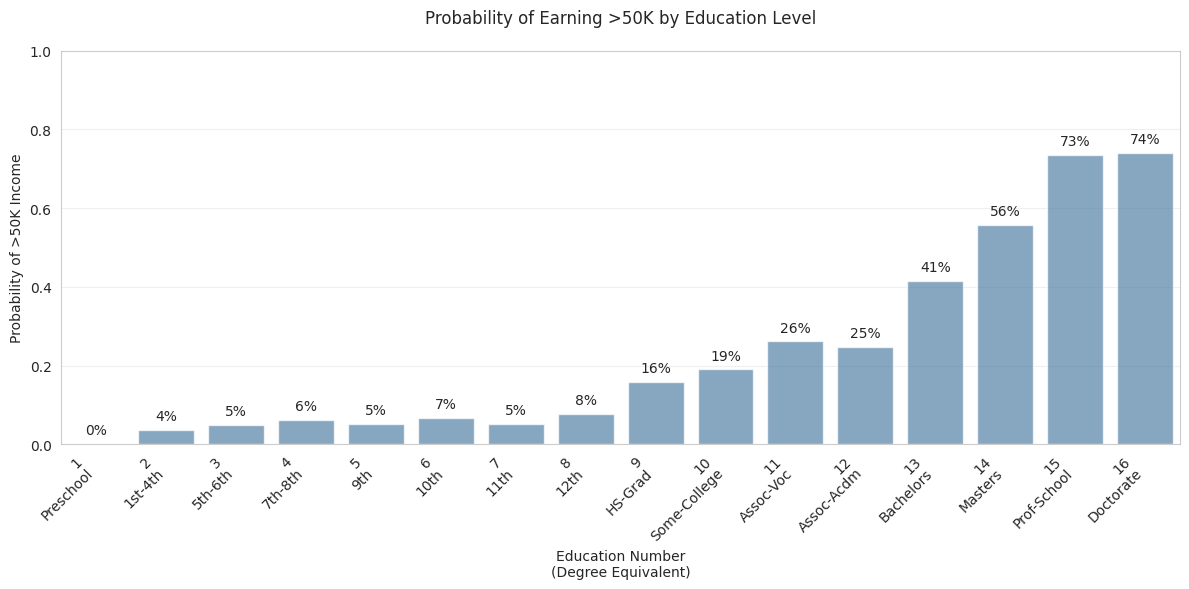

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Calculate probability of >50K by education_num
prob_data = df.groupby('education-num')['high_income'].mean().reset_index()
prob_data['degree'] = prob_data['education-num'].map({
    1: 'Preschool',
    2: '1st-4th',
    3: '5th-6th',
    4: '7th-8th',
    5: '9th',
    6: '10th',
    7: '11th',
    8: '12th',
    9: 'HS-Grad',
    10: 'Some-College',
    11: 'Assoc-Voc',
    12: 'Assoc-Acdm',
    13: 'Bachelors',
    14: 'Masters',
    15: 'Prof-School',
    16: 'Doctorate'
})

# 2. Create the plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=prob_data,
    x='education-num',
    y='high_income',
    color='steelblue',
    alpha=0.7
)

# 3. Customize x-axis labels
ax.set_xticks(range(len(prob_data)))
ax.set_xticklabels(
    [f"{num}\n{deg}" for num, deg in zip(prob_data['education-num'], prob_data['degree'])],
    rotation=45,
    ha='right',
    fontsize=10
)

# 4. Add labels and title
plt.title('Probability of Earning >50K by Education Level', pad=20)
plt.xlabel('Education Number\n(Degree Equivalent)')
plt.ylabel('Probability of >50K Income')
plt.ylim(0, 1)

# 5. Add value labels on bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.0%}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Conclusão

Podemos ver no gráfico acima que a educação é uma variável extremamente relevante para determinar a renda de um indivíduo. Existem 2 grandes saltos que são na conclusão da high school, e a conclusão do bachelor degree, onde os saltos tornam as chances 2x e 1,64x maior do que o nivel anterior. Mestrado e prof school/doutorado também apresentam grandes incrementos

## 3.2 Relação entre gênero, raça e educação

Uma vez que educação é uma variável extremamente importante para explicar renda. E foi constatada um gap de renda que afeta genero e raça e que muda de intensidade de acordo com a idade O primeiro exercício dessa subsessão será criar uma tabela para cada grupo etário e verificar como as desigualdades de gênero e raça na educação diferem através da idade. O objetivo é verificar se é possível observar o mesmo comportamento da renda na variável educação.

In [22]:
import pandas as pd

# 1. Select subgroups and age groups
subgroups = ['White_Male', 'White_Female', 'Black_Male', 'Black_Female']
age_groups = sorted(df['age_group'].unique())

# 2. Calculate distribution using education-num, grouped by age_group
education_dist = (
    df[df['subgroup'].isin(subgroups)]
    .groupby(['age_group', 'subgroup'])['education-num']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .unstack()
    .fillna(0)
)

# 3. Create mapping for display names
education_labels = {
    1: 'Preschool',
    2: '1st-4th',
    3: '5th-6th',
    4: '7th-8th',
    5: '9th',
    6: '10th',
    7: '11th',
    8: '12th',
    9: 'HS-grad',
    10: 'Some-college',
    11: 'Assoc-voc',
    12: 'Assoc-acdm',
    13: 'Bachelors',
    14: 'Masters',
    15: 'Prof-school',
    16: 'Doctorate'
}

# 4. Rename columns and format
education_dist = education_dist.rename(columns=education_labels)
formatted_dist = education_dist.applymap(lambda x: f"{x:.2f}%" if x != 0 else "0.00%")

# 5. Display one table per age group
for age in age_groups:
    age_data = formatted_dist.loc[age]

    styled_table = (
        age_data.style
        .set_caption(f'Education Distribution by Subgroup - {age}')
        .background_gradient(cmap='Blues', axis=1)
        .set_table_styles([{
            'selector': 'td',
            'props': [('text-align', 'center')]
        }])
    )

    display(styled_table)


/tmp/ipython-input-22-3569310134.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['age_group', 'subgroup'])['education-num']
/tmp/ipython-input-22-3569310134.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_dist = education_dist.applymap(lambda x: f"{x:.2f}%" if x != 0 else "0.00%")


education-num,Preschool,1st-4th,5th-6th,7th-8th,9th,10th,11th,12th,HS-grad,Some-college,Assoc-voc,Assoc-acdm,Bachelors,Masters,Prof-school,Doctorate
subgroup,,,,,,,,,,,,,,,,
Black_Female,0.00%,0.00%,0.00%,0.24%,1.89%,3.78%,6.15%,1.65%,33.57%,30.73%,3.78%,3.07%,14.18%,0.95%,0.00%,0.00%
Black_Male,0.00%,0.00%,0.44%,0.22%,2.66%,4.21%,6.87%,4.21%,42.35%,28.16%,1.11%,2.44%,6.87%,0.22%,0.22%,0.00%
White_Female,0.06%,0.16%,0.42%,0.49%,0.81%,3.57%,6.79%,2.24%,25.30%,35.40%,3.44%,3.41%,15.39%,1.98%,0.36%,0.16%
White_Male,0.18%,0.38%,1.39%,1.52%,1.90%,4.43%,6.99%,2.44%,32.63%,27.41%,2.98%,2.73%,13.26%,1.28%,0.38%,0.09%


education-num,Preschool,1st-4th,5th-6th,7th-8th,9th,10th,11th,12th,HS-grad,Some-college,Assoc-voc,Assoc-acdm,Bachelors,Masters,Prof-school,Doctorate
subgroup,,,,,,,,,,,,,,,,
Black_Female,0.26%,0.00%,0.00%,0.51%,0.77%,3.32%,3.83%,2.81%,38.01%,25.51%,7.14%,4.85%,10.20%,2.55%,0.26%,0.00%
Black_Male,0.25%,0.00%,0.00%,0.76%,1.78%,2.29%,4.58%,2.04%,38.68%,24.68%,4.58%,3.31%,13.49%,3.05%,0.25%,0.25%
White_Female,0.05%,0.33%,0.71%,0.99%,1.15%,2.03%,1.98%,0.77%,32.55%,20.40%,6.60%,5.55%,20.23%,4.51%,1.15%,0.99%
White_Male,0.08%,0.49%,0.76%,1.40%,1.44%,2.01%,2.60%,0.80%,35.68%,19.10%,5.44%,3.66%,18.70%,4.72%,1.99%,1.14%


education-num,Preschool,1st-4th,5th-6th,7th-8th,9th,10th,11th,12th,HS-grad,Some-college,Assoc-voc,Assoc-acdm,Bachelors,Masters,Prof-school,Doctorate
subgroup,,,,,,,,,,,,,,,,
Black_Female,0.00%,0.00%,0.23%,1.39%,1.62%,2.55%,4.41%,1.16%,39.44%,28.07%,2.55%,4.18%,9.74%,3.48%,0.46%,0.70%
Black_Male,0.25%,0.00%,0.50%,2.02%,2.77%,5.29%,2.77%,2.77%,36.27%,20.65%,3.27%,3.53%,13.35%,5.29%,1.26%,0.00%
White_Female,0.31%,0.37%,0.83%,0.83%,1.20%,0.94%,2.03%,0.57%,32.03%,22.59%,5.58%,4.59%,15.34%,9.86%,1.51%,1.41%
White_Male,0.08%,0.43%,0.86%,1.45%,0.94%,1.53%,1.69%,0.65%,29.19%,19.33%,5.01%,3.67%,21.67%,8.11%,3.56%,1.83%


education-num,Preschool,1st-4th,5th-6th,7th-8th,9th,10th,11th,12th,HS-grad,Some-college,Assoc-voc,Assoc-acdm,Bachelors,Masters,Prof-school,Doctorate
subgroup,,,,,,,,,,,,,,,,
Black_Female,0.00%,2.59%,2.27%,6.15%,4.53%,7.77%,7.12%,0.97%,34.95%,15.53%,4.21%,2.59%,7.44%,2.91%,0.65%,0.32%
Black_Male,0.61%,2.44%,2.74%,4.88%,8.23%,6.10%,3.35%,1.83%,35.98%,12.50%,2.44%,3.35%,8.54%,4.27%,0.91%,1.83%
White_Female,0.16%,0.71%,1.15%,3.78%,1.81%,2.74%,2.52%,0.88%,37.82%,20.53%,3.94%,2.74%,10.78%,7.83%,0.99%,1.64%
White_Male,0.20%,0.84%,1.51%,4.64%,2.04%,3.60%,2.58%,0.92%,32.68%,16.91%,3.21%,1.82%,15.75%,7.55%,2.92%,2.82%


Conforme esperado, podemos obsevar um maior índice de escolaridade entre pessoas brancas comparado a pessoas negras. E observamos uma redução do gap de gênero com o passar dos anos. Mas diferente do que acontece na renda, aqui vimos que a probabilidade de uma mulher concluir o ensino superior se torna maior do que dos homens. O próximo passo será testar pra cada grupo etário a diferença entre o índice de conclusão de ensino superior + entre os subgrupos com a idade para verificar a relevância estatística dos resultadosm, sendo:
H0: % de bachelor+ de cada subgrupo = White male
H1: % de bachelor de cada subgrupo diferente de White male

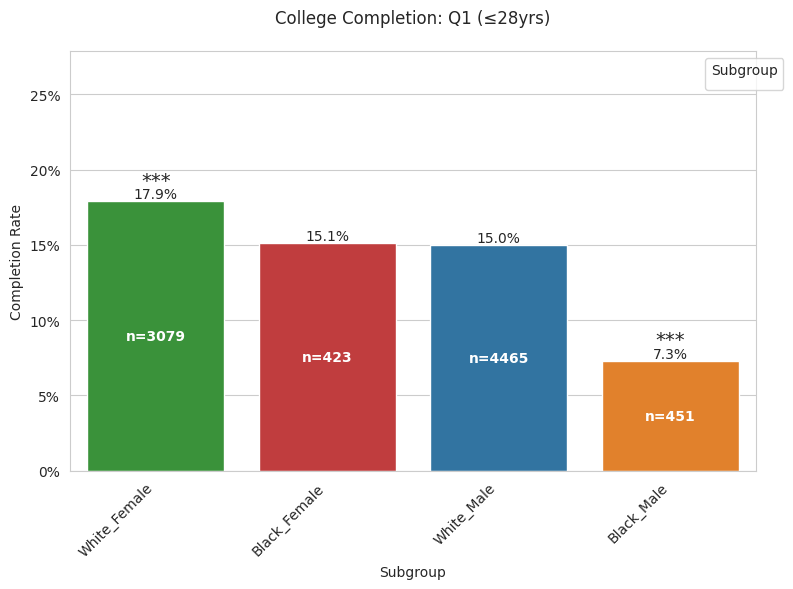

/tmp/ipython-input-39-1045605910.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


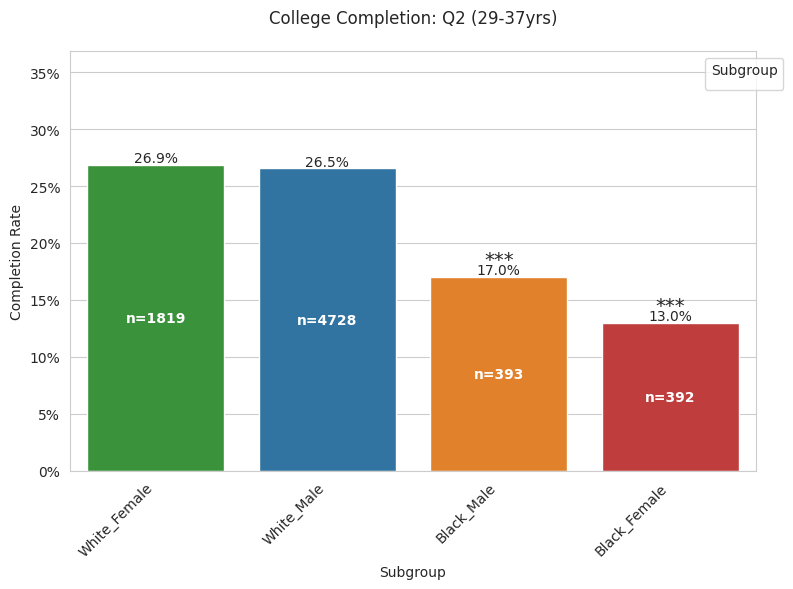

/tmp/ipython-input-39-1045605910.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


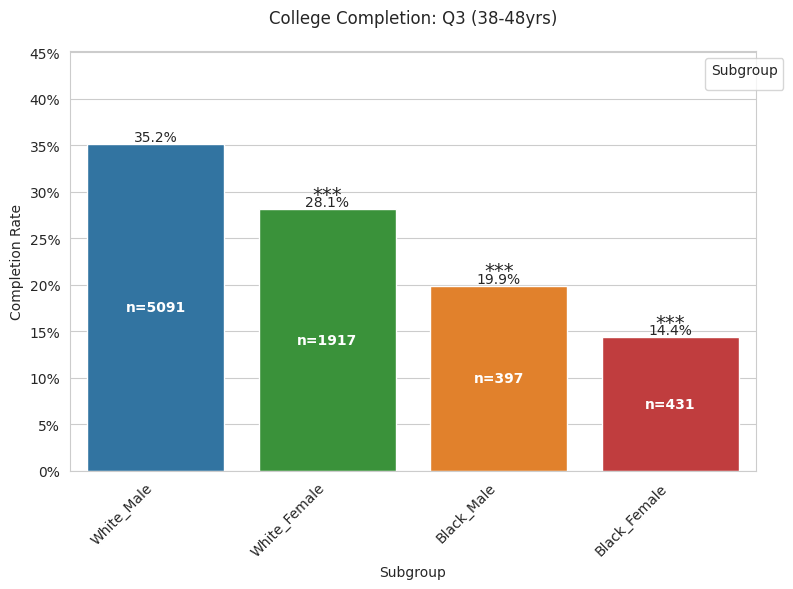

/tmp/ipython-input-39-1045605910.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


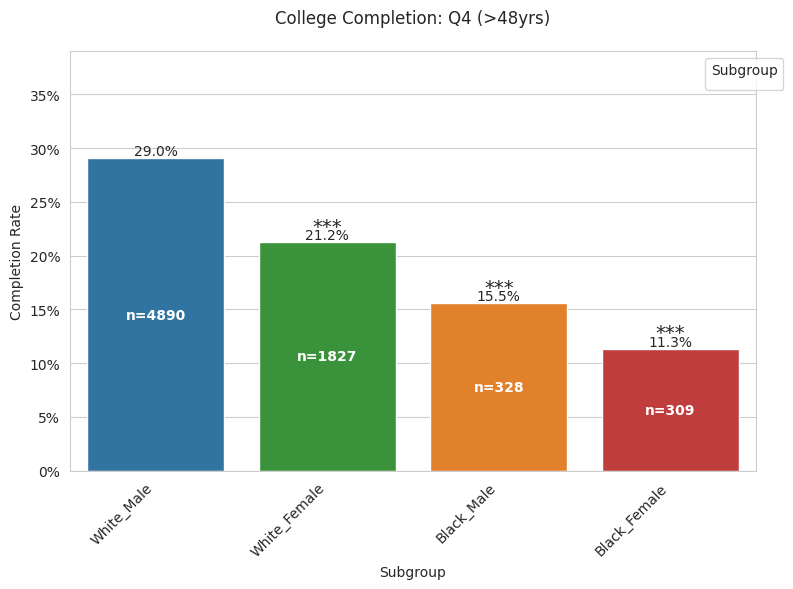

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd
import numpy as np

# Ensure 'race' and 'sex' columns are clean
if 'race' not in df.columns or 'sex' not in df.columns:
     print("Error: 'race' or 'sex' column not found.")
else:
    df['race'] = df['race'].str.strip()
    df['sex'] = df['sex'].str.strip()

# Ensure 'subgroup' column exists
if 'subgroup' not in df.columns:
    df['subgroup'] = df['race'].str.strip() + "_" + df['sex'].str.strip()


# Ensure 'age_group' column exists
if 'age_group' not in df.columns:
    # Recreate 'age_group' column using the logic from earlier in the notebook
    if 'age' in df.columns:
        q1, q2, q3 = df['age'].quantile([0.25, 0.5, 0.75])
        bins = [-np.inf, q1, q2, q3, np.inf]
        labels = [
            f'Q1 (≤{int(q1)}yrs)',
            f'Q2 ({int(q1)+1}-{int(q2)}yrs)',
            f'Q3 ({int(q2)+1}-{int(q3)}yrs)',
            f'Q4 (>{int(q3)}yrs)'
        ]
        df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
    else:
        print("Error: 'age' column not found to create 'age_group'.")


# Define simplified education groups and order
edu_order = ['1st-8th', '9th-12th', 'HS-grad', 'Some-college', 'Associate', 'Bachelors+']
# Ensure 'education-num' column exists before creating 'education_grouped'
if 'education-num' in df.columns:
    df['education_grouped'] = df['education-num'].apply(
        lambda x: '1st-8th' if 1 <= x <= 4 else
                  '9th-12th' if 5 <= x <= 8 else
                  'HS-grad' if x == 9 else
                  'Some-college' if x == 10 else
                  'Associate' if x in [11,12] else
                  'Bachelors+' if x >= 13 else None
    )
else:
    print("Error: 'education-num' column not found to create 'education_grouped'.")


# Calculate completion rates (Probability of 'Bachelors+')
# Ensure age_group and subgroup exist before grouping
if 'age_group' in df.columns and 'subgroup' in df.columns and 'education_grouped' in df.columns:
    completion_rates = (df.groupby(['age_group', 'subgroup'], observed=True)
                        .apply(lambda x: (x['education_grouped'] == 'Bachelors+').mean())
                        .reset_index(name='Completion Rate')
                       )

    # Calculate total counts (N)
    total_counts = (df.groupby(['age_group', 'subgroup'], observed=True)
                    .size()
                    .reset_index(name='N')
                   )

    # Merge completion rates and counts
    completion_rates = pd.merge(completion_rates, total_counts, on=['age_group', 'subgroup'])


    # Filter to key subgroups
    key_subgroups = ['White_Male', 'Black_Male', 'White_Female', 'Black_Female']
    plot_data = completion_rates[completion_rates['subgroup'].isin(key_subgroups)].copy()

    # Define consistent colors for subgroups
    subgroup_colors = {
        'White_Male': '#1f77b4',  # Blue
        'Black_Male': '#ff7f0e',   # Orange
        'White_Female': '#2ca02c', # Green
        'Black_Female': '#d62728'  # Red
    }

    # Create one plot per age group
    for age_group in sorted(plot_data['age_group'].unique()):
        plt.figure(figsize=(8, 6))
        age_data = plot_data[plot_data['age_group'] == age_group].copy() # Use copy

        # Sort by completion rate (descending) for plotting order
        age_data_sorted = age_data.sort_values('Completion Rate', ascending=False)

        # Bar plot
        ax = sns.barplot(
            data=age_data_sorted, # Use sorted data for consistent order
            x='subgroup',
            y='Completion Rate',
            palette=subgroup_colors,
            order=age_data_sorted['subgroup'],  # Maintain sorted order
            errorbar=None
        )

        # Calculate significance vs White Male and store in a dictionary for easy lookup
        significance_map = {}
        # Ensure White_Male exists in the age_data_sorted before accessing
        if 'White_Male' in age_data_sorted['subgroup'].values:
            white_male_rate = age_data_sorted[age_data_sorted['subgroup'] == 'White_Male']['Completion Rate'].values[0]
            white_male_n = age_data_sorted[age_data_sorted['subgroup'] == 'White_Male']['N'].values[0]

            for i, row in age_data_sorted.iterrows():
                if row['subgroup'] != 'White_Male':
                    # Ensure counts are integers for proportions_ztest and avoid division by zero
                    count1 = int(round(row['Completion Rate'] * row['N']))
                    nobs1 = int(round(row['N']))
                    count2 = int(round(white_male_rate * white_male_n))
                    nobs2 = int(round(white_male_n))


                    if nobs1 > 0 and nobs2 > 0 and count1 <= nobs1 and count2 <= nobs2:
                        stat, pval = proportions_ztest([count1, count2], [nobs1, nobs2])
                        stars = '*' * sum(pval < cutoff for cutoff in [0.05, 0.01, 0.001])
                        significance_map[row['subgroup']] = stars
                    else:
                        significance_map[row['subgroup']] = '' # No stars if test is not possible
                else:
                     significance_map[row['subgroup']] = '' # No stars for the reference group
        else:
            # Handle case where White_Male is not in this age group's data
            for subgroup in age_data_sorted['subgroup']:
                 significance_map[subgroup] = ''


        # Add significance stars and value labels using patch positions
        for i, patch in enumerate(ax.patches):
            # Get the subgroup name from the order used in the barplot
            subgroup = age_data_sorted['subgroup'].iloc[i]
            completion_rate = age_data_sorted['Completion Rate'].iloc[i]
            n_count = int(age_data_sorted['N'].iloc[i])

            # Add significance stars (if significant and not White_Male)
            if subgroup in significance_map and significance_map[subgroup]:
                ax.text(
                    patch.get_x() + patch.get_width() / 2., # x-position at center of bar
                    patch.get_height() + 0.01, # y-position slightly above bar
                    significance_map[subgroup],
                    ha='center',
                    fontsize=14
                )

            # Add value labels
            ax.annotate(
                f"{completion_rate:.1%}",
                (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                ha='center', va='center',
                xytext=(0, 5), # Offset text slightly above the bar
                textcoords='offset points',
                fontsize=10
            )

             # Add count labels inside the bar
            ax.text(
                patch.get_x() + patch.get_width() / 2., # x-position at center of bar
                patch.get_height() / 2., # y-position in the middle of the bar
                f"n={n_count}",
                ha='center', va='center',
                color='white',
                fontweight='bold',
                fontsize=10
            )


        # Customize plot
        plt.title(f'College Completion: {age_group}', pad=20)
        plt.ylabel('Completion Rate')
        plt.xlabel('Subgroup')
        plt.ylim(0, age_data_sorted['Completion Rate'].max() + 0.1) # Adjust y-limit

        # Calculate y-ticks safely
        max_rate = age_data_sorted['Completion Rate'].max()
        if max_rate > 0:
            plt.yticks(np.arange(0, max_rate + 0.1, 0.05), [f'{int(y*100)}%' for y in np.arange(0, max_rate + 0.1, 0.05)]) # Adjust y-ticks
        else:
            plt.yticks([0, 0.05], ['0%', '5%']) # Set default ticks if max rate is 0

        plt.xticks(rotation=45, ha='right') # Rotate x-labels

        # Add a more informative legend
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles, labels, title='Subgroup', bbox_to_anchor=(1.05, 1))

        plt.tight_layout()
        plt.show()
else:
    print("Required columns ('age_group', 'subgroup', 'education_grouped') not found for analysis.")

Para o grupo dos mais jovens podemos observar que:
% bachelor + pra mulheres brancas é significantemente maior que para homens brancos. O que mostra a mudança de sinal do viés de gênero ou seja mulheres tendem a concluir a faculdade com mais frequencia. Mulheres brancas também tem mais escolaridade que homens em todos os níveis de educação exceto prof-school e doutorado.
Mulheres negras e homens brancos não apresentam diferença estatística significativa. Mulheres negras se beneficiam de um viés positivo de gênero para conclusão de estudos, mas sofrem com o viés racial o efeito coloca elas em uma situação de empate com o grupo de controle (homens brancos). Cabe ressaltar que apesar disso, as mulheres negras ainda são o grupo com menor renda, conforme visto anteriormente, apesar de estudarem mais do que os homens negros. Os homens negros passam a ser o grupo com menor índice de escolaridade, como o resultado é de uma diferença estatísticamente relevante (p-valor <0,01) contra o grupo de homens brancos, uma análise de DiD irá mostrar uma diferença igualmente relevante com mulheres negras uma vez que ambos estão no mesmo patamar.

Para o grupo etário 2, podemos observar que a penalidade de gênero entre as mulheres brancas foi eliminada mas as mulheres negras continuam a enfrentar uma penalidade racial. Uma potencial explicação é a ascensão primeira de movimentos feministas conhecidos como "feminismo branco", o que fez com que esse efeito de redução do gap de gênero viesse antes para mulheres brancas. Mas não é possível fazer esse tipo de afirmação apenas com essa análise. Vemos que para os grupos etários 3 e 4 as mulheres brancas e negras sofrem com penalidades de gênero. O teste z rejeita a hipótese nula para todos os casos.

## Conclusão

Com os gráficos acima fica mais fácil perceber como que nas faixas etárias maiores existia um viés de raça e gênero muito marcado entre a escolaridade mas que com o passar dos anos. O viés de gênero é anulado e até revertido, com as mulheres tendo um índice de escolaridade maior que o dos homens, mas o viés de raça continua presente. Isso sugere a necessidade de políticas que visem especificamente o incentivo a homens negros acessarem o ensino superior.
Por fim, o fato das mulheres mais jovens terem conseguido acessar a renda e isso ter diminuido mas não eliminado o gap de renda, sugere que a escolaridade é um dos fatores mas não um fator predominante na desigualdade salarial entre homens e mulheres

#4. Profissões

Os próximos gráficos analisam como a profissão de um indivíduo afeta a renda

In [33]:
# Get unique occupations and their counts
occupation_counts = df['occupation'].value_counts()

# Display in a clean format
print("All Occupation Values (with counts):")
print("----------------------------------")
print(occupation_counts.to_string())  # Shows counts by default

# Alternative: Just the unique values without counts
print("\nJust Unique Occupation Values:")
print("-----------------------------")
print(df['occupation'].unique())

All Occupation Values (with counts):
----------------------------------
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Unknown              1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9

Just Unique Occupation Values:
-----------------------------
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Unknown'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']


Primeiro temos uma visão de quais são as profissões representadas na amostra e qual a frequencia que cada uma ocorre. Podemos observar que forças armadas aparece apenas 9 vezes na amostra o que significa que as conclusões sobre esse grupo específico não serão confiáveis se baseado apenas nos dados que temos disponíveis

O próximo passo será entender o quanto que a profissão afeta a variável renda

Occupation Probabilities:
 occupation
Priv-house-serv      0.006711
Other-service        0.041578
Handlers-cleaners    0.062774
Unknown              0.103635
Armed-Forces         0.111111
Farming-fishing      0.115694
Machine-op-inspct    0.124875
Adm-clerical         0.134483
Transport-moving     0.200376
Craft-repair         0.226641
Sales                0.269315
Tech-support         0.304957
Protective-serv      0.325116
Prof-specialty       0.449034
Exec-managerial      0.484014
Name: high_income, dtype: float64


/tmp/ipython-input-25-3276645718.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


Patch 0 height: 0.006711409395973154
Patch 1 height: 0.04157814871016692
Patch 2 height: 0.06277372262773723
Patch 3 height: 0.10363537710255019
Patch 4 height: 0.1111111111111111
Patch 5 height: 0.11569416498993963
Patch 6 height: 0.12487512487512488
Patch 7 height: 0.13448275862068965
Patch 8 height: 0.20037570444583594
Patch 9 height: 0.22664064405952672
Patch 10 height: 0.2693150684931507
Patch 11 height: 0.30495689655172414
Patch 12 height: 0.325115562403698
Patch 13 height: 0.44903381642512075
Patch 14 height: 0.4840137727496311


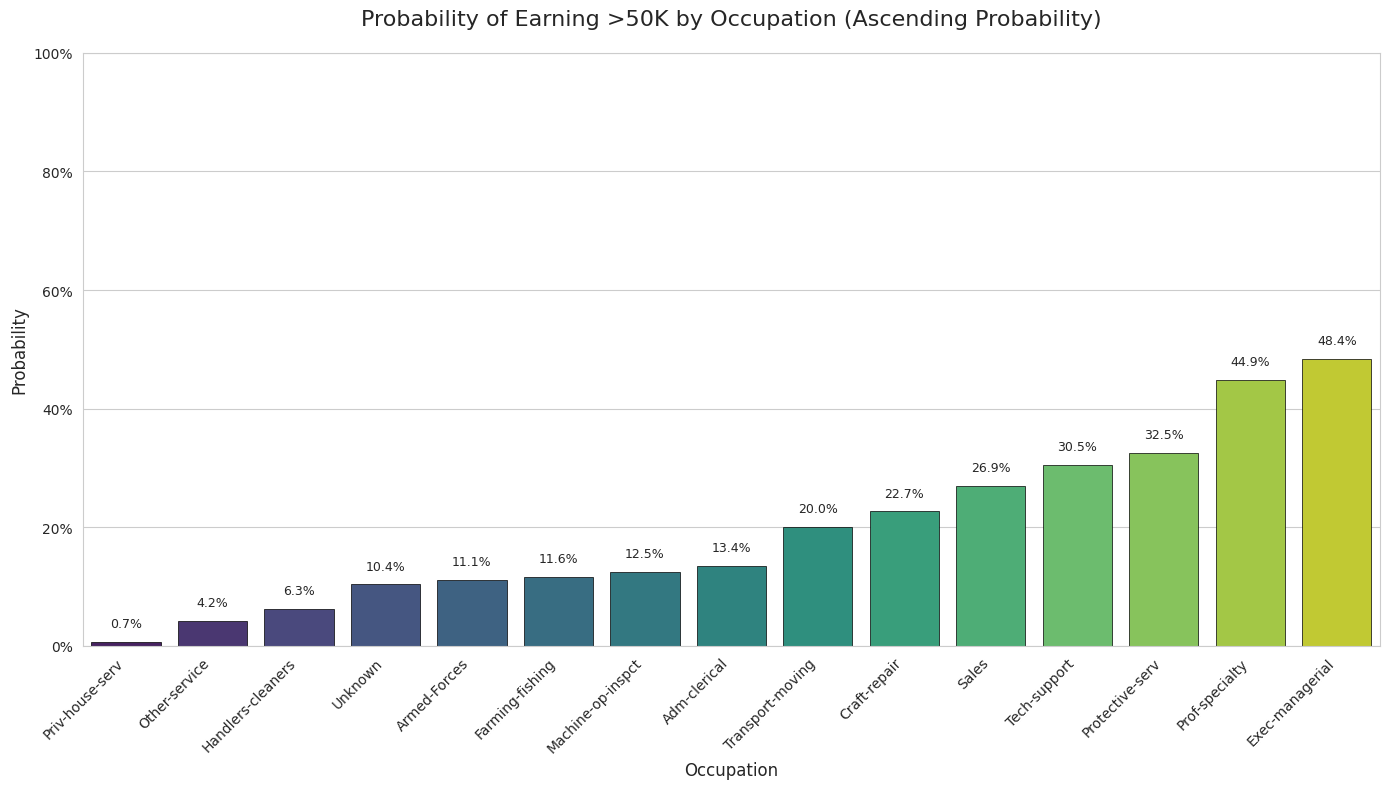

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter # Import PercentFormatter

# Prepare the high_income column (ensure it exists)
# Clean 'income' column first
df['income'] = df['income'].str.strip()
df['high_income'] = (df['income'] == '>50K').astype(int)

# 1. Clean occupation data
df['occupation'] = df['occupation'].str.strip().replace('?', 'Unknown').fillna('Unknown')


# 2. Calculate probability of >50K by occupation and order by it
# Use the numerical 'high_income' column for mean calculation (probability)
occupation_prob = (df.groupby('occupation', observed=True)['high_income'] # Added observed=True
                   .mean() # Calculate mean for probability
                   .sort_values(ascending=True)) # Changed to ascending=True

print("Occupation Probabilities:\n", occupation_prob)


# Get the ordered list of occupations
occ_order = occupation_prob.index


# 3. Create the plot
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Create bar plot using calculated probabilities and order
ax = sns.barplot(
    x=occ_order, # Use ordered occupations on x-axis
    y=occupation_prob.values, # Use probabilities on y-axis
    palette="viridis", # Keep palette, though less critical for single bar plot
    edgecolor='black',
    linewidth=0.5
)

# 4. Customize the plot
plt.title('Probability of Earning >50K by Occupation (Ascending Probability)', fontsize=16, pad=20)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.ylim(0, 1)

# Format y-axis as percentages
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Rotate x-axis labels individually for readability
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')


# 5. Add annotations
occupation_counts = df['occupation'].value_counts()
# Add value labels (percentage)
for i, patch in enumerate(ax.patches):
    # Percentage label (slightly above the bar)
    height = patch.get_height()
    print(f"Patch {i} height: {height}") # Print patch height
    ax.text(patch.get_x() + patch.get_width()/2., height + 0.02,
            f'{height:.1%}',
            ha='center', va='bottom', fontsize=9)

    # Sample size label (below the bar) - Removed as requested
    # Get the occupation name from the ordered list
    # occupation = occ_order[i]
    # if occupation in occupation_counts: # Check if occupation exists in counts
    #     count = occupation_counts[occupation]
    #     # Position text at y=-0.05 (below the bottom of the plot) in data coordinates
    #     ax.text(i, -0.05,
    #             f'n={count}',
    #             ha='center', va='top', fontsize=8, color='dimgrey')


# Remove highlight function as it's specific to boxplots and not needed for this bar plot
# def highlight_occupation(...): ...

# Remove highlight calls
# if 'Exec-managerial' in occ_order: ...
# if 'Prof-specialty' in occ_order: ...


plt.tight_layout()
plt.show()

Podemos observar que a ocupação de um indivíduo afeta significativamente a probabilidade deste estar no grupo de renda mais alta. As profissões com maior média de renda são cargos de gerência/executivos seguido de perto por profissões especializadas. Já trabalhos como serviços domésticos ou de limpeza tem a menor incidência de renda. Não é necessário uma análise para chegar a essa conclusão, uma vez que isso é um fato muito conhecido por todos. Mas o próximo passo será ver como estas probabilidades se comportam dentro os diferentes subgrupos de gênero e raça

<Figure size 1600x800 with 0 Axes>

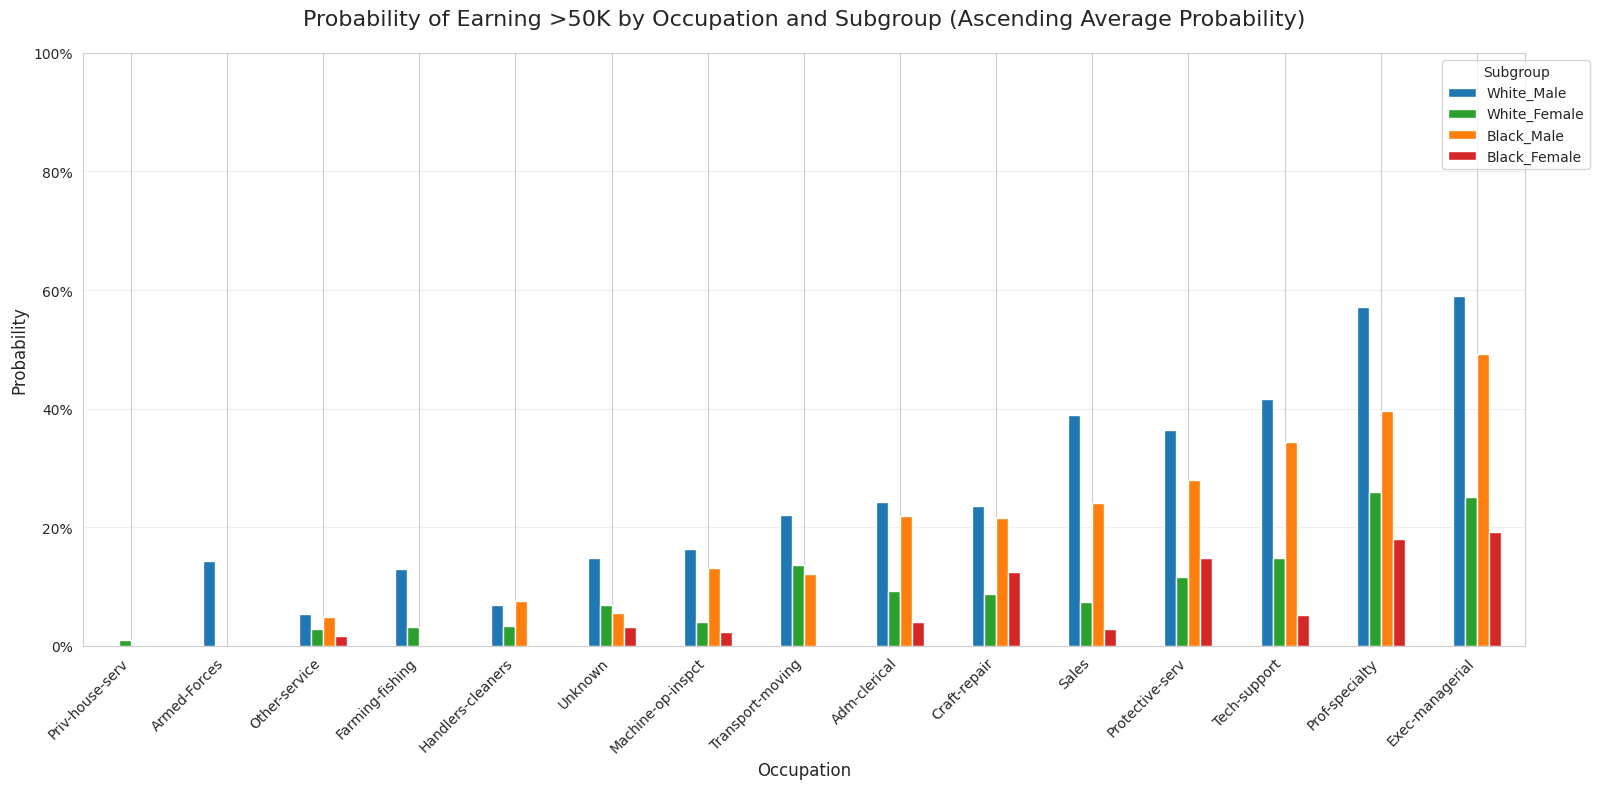

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter # Import PercentFormatter

# Ensure 'race' and 'sex' columns are clean and create the 'subgroup' column
df['race'] = df['race'].str.strip()
df['sex'] = df['sex'].str.strip()
df['subgroup'] = df['race'].str.strip() + "_" + df['sex'].str.strip()

# Prepare the high_income column (ensure it exists and is cleaned)
df['income'] = df['income'].str.strip() # Ensure income is clean
df['high_income'] = (df['income'] == '>50K').astype(int)

# Clean occupation data
df['occupation'] = df['occupation'].str.strip().replace('?', 'Unknown').fillna('Unknown')


# Calculate probability of >50K by occupation and subgroup and get counts
occupation_subgroup_data = df.groupby(['occupation', 'subgroup'], observed=True)['high_income'].agg(['mean', 'count']).reset_index()
occupation_subgroup_data.rename(columns={'mean': 'Probability', 'count': 'Count'}, inplace=True)


# Filter for the key subgroups
key_subgroups = ['White_Male', 'White_Female', 'Black_Male', 'Black_Female']
plot_data = occupation_subgroup_data[occupation_subgroup_data['subgroup'].isin(key_subgroups)].copy()

# Pivot data for easier plotting
# We will pivot only the Probability for the bar height, but keep the Count column for annotations
pivot_prob_data = plot_data.pivot(index='occupation', columns='subgroup', values='Probability').fillna(0)
pivot_count_data = plot_data.pivot(index='occupation', columns='subgroup', values='Count').fillna(0) # Pivot counts separately

# Sort occupations based on the average probability across key subgroups (using ascending order as previously requested)
# Calculate the average probability across the key subgroups for sorting
pivot_prob_data['avg_prob'] = pivot_prob_data[key_subgroups].mean(axis=1)
pivot_prob_data = pivot_prob_data.sort_values('avg_prob', ascending=True) # Using ascending=True
# Drop the temporary average column
pivot_prob_data = pivot_prob_data.drop(columns='avg_prob')

# Get the ordered list of occupations based on the sorted probability pivot table
occ_order = pivot_prob_data.index


# Define consistent colors for subgroups
subgroup_colors = {
    'White_Male': '#1f77b4',  # Blue
    'Black_Male': '#ff7f0e',   # Orange
    'White_Female': '#2ca02c', # Green
    'Black_Female': '#d62728'  # Red
}

# Create the plot
plt.figure(figsize=(16, 8)) # Adjust figure size
ax = pivot_prob_data[key_subgroups].plot(kind='bar', figsize=(16, 8), color=[subgroup_colors[sub] for sub in key_subgroups])

# Customize the plot
plt.title('Probability of Earning >50K by Occupation and Subgroup (Ascending Average Probability)', fontsize=16, pad=20)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.ylim(0, 1) # Revert y-limit since annotations are removed

# Format y-axis as percentages
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add annotations (Probability Percentage and Count) - Removed as requested
# bars = ax.patches
# n_subgroups = len(key_subgroups)

# for i, bar in enumerate(bars):
#     height = bar.get_height()
#     occupation_idx = i // n_subgroups
#     subgroup_idx = i % n_subgroups
#     occupation_name = occ_order[occupation_idx]
#     subgroup_name = key_subgroups[subgroup_idx]
#     count = int(pivot_count_data.loc[occupation_name, subgroup_name])

    # Add Probability Percentage above the bar - Removed
    # if height > 0:
    #     ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
    #             f'{height:.0%}',
    #             ha='center', va='bottom', fontsize=8, color='black')

    # Add Count inside or below the bar - Removed
    # count_y_pos = height / 2. if height > 0.15 else height + 0.005
    # va = 'center' if height > 0.15 else 'bottom'
    # text_color = 'white' if height > 0.15 else 'dimgrey'
    # font_size = 7

    # if count > 0:
    #      ax.text(bar.get_x() + bar.get_width()/2., count_y_pos,
    #             f'n={count}',
    #             ha='center', va=va, fontsize=font_size, color=text_color, fontweight='bold')


# Add legend
plt.legend(title='Subgroup', bbox_to_anchor=(1.05, 1))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Agora, podemos observar que mesmo quando comparamos dentro da mesma profissão, as desigualdades de gênero e raça na renda persistem. Em quase todos os grupos, temos um perfil de desigualdade semelhante com homens brancos ganhando mais, seguido por homens negros, depois mulheres brancas e por fim, mulheres negras. Podemos notar que a intensidade destas diferenças variam com os grupos. Em alguns grupos como craft repair e protective serv tivemos mulheres negras superando as mulheres brancas mas isso pode ser devido ao fato de termos poucas observações de mulheres negras nessas funções, o que aumenta a variância.

In [27]:
print("Count of People by Occupation and Subgroup:")
# Pivot the data to show counts
pivot_count_data = plot_data.pivot(index='occupation', columns='subgroup', values='Count').fillna(0).astype(int)

# Reindex the pivoted count data to match the occupation order used in the plot
pivot_count_data = pivot_count_data.reindex(occ_order)

display(pivot_count_data)

# You can also print it if you prefer a simple console output
# print("\n", pivot_count_data)


Count of People by Occupation and Subgroup:


subgroup,Black_Female,Black_Male,White_Female,White_Male
occupation,,,,
Priv-house-serv,28,0,106,8
Armed-Forces,0,1,0,7
Other-service,348,223,1363,1160
Farming-fishing,2,40,62,853
Handlers-cleaners,33,146,119,1015
Unknown,125,90,655,860
Machine-op-inspct,130,144,380,1231
Transport-moving,21,149,66,1294
Adm-clerical,367,123,2046,1038


Podemos observar pela tabela acima que as duas ocorrência em que mulheres negras tem a probabilidade de >=50k maior que mulheres brancas de fato tem n=< 40

Nosso próximo passo será verificar quais são as profissões com maior gap entre raças. Ranqueando da maior pra menor a diferença de p 50k+ entre brancos e negros e mostrando a relavância estatística do resultado (p-valor)

In [57]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from IPython.display import display, HTML

# 1. First ensure income is binary numeric
print("Unique income values:", df['income'].unique())  # Debug check

# Convert income to binary numeric if needed
if df['income'].dtype != 'int64':
    df['income_binary'] = (df['income'] == '>50K').astype(int)
    y_var = 'income_binary'
else:
    y_var = 'income'

# 2. Filter to only White and Black racial groups
df = df[df['race'].isin(['White', 'Black'])]

# 3. Verify we have data after filtering
print("\nData count after filtering:", len(df))
print("Race distribution:\n", df['race'].value_counts())

# 4. Set reference categories (only if we have data)
if len(df) > 0:
    df['age_group'] = pd.Categorical(df['age_group'], categories=['Q1 (≤28yrs)', 'Q2 (29-37yrs)', 'Q3 (38-48yrs)', 'Q4 (>48yrs)'], ordered=False)
    df['sex'] = pd.Categorical(df['sex'], categories=['Male', 'Female'], ordered=False)
    df['race'] = pd.Categorical(df['race'], categories=['White', 'Black'], ordered=False)
    df['education'] = pd.Categorical(df['education'], categories=['HS-grad', 'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate'], ordered=False)
    df['occupation'] = pd.Categorical(df['occupation'], categories=['Unknown', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'], ordered=False)

    # 5. Fit the model
    try:
        model = ols(f'{y_var} ~ C(age_group) + C(sex) + C(race) + C(education) + C(occupation)',
                   data=df).fit(cov_type='HC1')

        # 6. Create and display coefficient tables
        def create_coef_table(model, prefix, label):
            coefs = pd.DataFrame({
                'Variable': [x.replace(prefix, '') for x in model.params.index if x.startswith(prefix)],
                'Coefficient': [model.params[x] for x in model.params.index if x.startswith(prefix)],
                'P-value': [model.pvalues[x] for x in model.params.index if x.startswith(prefix)],
                'Impact': [f"{model.params[x]:.3f} ({'*' * sum([model.pvalues[x] < cutoff for cutoff in [0.05, 0.01, 0.001]])}"
                          for x in model.params.index if x.startswith(prefix)]
            })
            return coefs.sort_values('Coefficient', ascending=False)

        tables = {
            'Age Group (vs Q1)': 'C(age_group)[T.',
            'Gender (vs Male)': 'C(sex)[T.',
            'Race (vs White)': 'C(race)[T.',
            'Education (vs HS-grad)': 'C(education)[T.',
            'Occupation (vs Unknown)': 'C(occupation)[T.'
        }

        for label, prefix in tables.items():
            display(HTML(f"<h3>{label}</h3>"))
            table = create_coef_table(model, prefix, label.split(' (')[0])
            display(table.style.format({'Coefficient': '{:.3f}', 'P-value': '{:.4f}'})
                      .set_properties(**{'text-align': 'left'})
                      .hide(axis='index'))

    except Exception as e:
        print(f"Model failed to run: {str(e)}")
else:
    print("No data available after filtering - check your race categories")

Unique income values: ['<=50K' '>50K']

Data count after filtering: 30940
Race distribution:
 race
White    27816
Black     3124
Name: count, dtype: int64
Model failed to run: zero-size array to reduction operation maximum which has no identity


Podemos observar pela tabela anterior que das 5 profissões com maior renda 4 delas tem resultado estatísticamente significativo (p-valor <0,05) Sendo 3 delas <0,01. Apenas protective-serv foi uma categoria entre as de maior renda que não apresentou resultado estatísticamente significativo. Embora p-valor 0,0643 de indícios de que a desvantagem exista. Entre as profissões de menor renda a desvantagem tem valores absolutos menores ou resultados que não são estatísticamente relevantes. Isso pode ser interpretado como um possível viés racial na hora de dar aumentos e promoções dentro de uma determinada carreira

In [29]:
# Calculate the gender gap for each occupation (Men - Women)
# Ensure 'sex' column is clean
df['sex'] = df['sex'].str.strip()

# Ensure 'income' column is clean and create 'high_income' column
df['income'] = df['income'].str.strip()
df['high_income'] = (df['income'] == '>50K').astype(int)

# Clean occupation data
df['occupation'] = df['occupation'].str.strip().replace('?', 'Unknown').fillna('Unknown')

# Filter for Men and Women populations
men_df = df[df['sex'] == 'Male'].copy()
women_df = df[df['sex'] == 'Female'].copy()

# Calculate probability of >50K by occupation for Men and Women
men_prob_occ = men_df.groupby('occupation', observed=True)['high_income'].mean().rename('P(>50K) Men')
women_prob_occ = women_df.groupby('occupation', observed=True)['high_income'].mean().rename('P(>50K) Women')

# Combine probabilities
gender_gap_occ = pd.concat([men_prob_occ, women_prob_occ], axis=1)

# Calculate the gender gap (Men - Women)
gender_gap_occ['Gender Gap (Men - Women)'] = gender_gap_occ['P(>50K) Men'] - gender_gap_occ['P(>50K) Women']

# Drop occupations where one of the genders has no data
gender_gap_occ = gender_gap_occ.dropna()

# Calculate statistical significance (Fisher's Exact Test)
p_values_gender = []
for occ in gender_gap_occ.index:
    # Contingency table for the occupation
    men_high = len(df[(df['occupation'] == occ) & (df['sex'] == 'Male') & (df['income'] == '>50K')])
    men_low = len(df[(df['occupation'] == occ) & (df['sex'] == 'Male') & (df['income'] == '<=50K')])
    women_high = len(df[(df['occupation'] == occ) & (df['sex'] == 'Female') & (df['income'] == '>50K')])
    women_low = len(df[(df['occupation'] == occ) & (df['sex'] == 'Female') & (df['income'] == '<=50K')])

    # Avoid performing test if any counts are zero for a category
    if (men_high + men_low) > 0 and (women_high + women_low) > 0:
         table = [[men_high, men_low], [women_high, women_low]]
         # Check if any row or column sum is zero before performing test
         if all(sum(row) > 0 for row in table) and all(sum(col) > 0 for col in zip(*table)):
              _, pval = fisher_exact(table)
              p_values_gender.append({'occupation': occ, 'p-value': pval})
         else:
              p_values_gender.append({'occupation': occ, 'p-value': np.nan}) # Indicate no test was performed
    else:
        p_values_gender.append({'occupation': occ, 'p-value': np.nan}) # Indicate no test was performed


p_values_gender_df = pd.DataFrame(p_values_gender).set_index('occupation')

# Merge p-values with the gender gap data
gender_gap_occ = gender_gap_occ.merge(p_values_gender_df, left_index=True, right_index=True, how='left')

# Calculate Absolute Gap for ranking
gender_gap_occ['Abs Gap'] = gender_gap_occ['Gender Gap (Men - Women)'].abs()

# Rank occupations by the absolute value of the gender gap (descending)
gender_gap_ranked = gender_gap_occ.sort_values('Abs Gap', ascending=False)

# Select and format columns for display
display_cols_gender = ['P(>50K) Men', 'P(>50K) Women', 'Gender Gap (Men - Women)', 'p-value', 'Abs Gap']
styled_ranked_table_gender = (gender_gap_ranked[display_cols_gender].style
    .format({
        'P(>50K) Men': '{:.1%}',
        'P(>50K) Women': '{:.1%}',
        'Gender Gap (Men - Women)': '{:+.1%}', # Use + for positive values
        'p-value': '{:.4f}',
        'Abs Gap': '{:.1%}'
    })
    .background_gradient(subset=['Gender Gap (Men - Women)'], cmap='RdBu', vmin=-1, vmax=1)
    .set_caption('Occupation Ranking by Gender Gap in Probability of Earning >50K'))

# Display the table
display(styled_ranked_table_gender)

,P(>50K) Men,P(>50K) Women,Gender Gap (Men - Women),p-value,Abs Gap
occupation,,,,,
Exec-managerial,58.1%,24.2%,+33.9%,0.0000,33.9%
Prof-specialty,56.2%,25.4%,+30.7%,0.0000,30.7%
Sales,37.5%,7.0%,+30.5%,0.0000,30.5%
Tech-support,41.0%,12.9%,+28.1%,0.0000,28.1%
Protective-serv,35.1%,13.2%,+21.9%,0.0001,21.9%
Adm-clerical,23.9%,8.4%,+15.6%,0.0000,15.6%
Craft-repair,23.4%,9.0%,+14.4%,0.0000,14.4%
Machine-op-inspct,15.8%,3.6%,+12.2%,0.0000,12.2%
Transport-moving,20.6%,10.0%,+10.6%,0.0140,10.6%


Podemos observar na tabela todas as profissões nos quais temos pelo menos 1 observação para cada gênero, o que excluiu a carreira militar. Podemos ver que pra todas as carreiras temosum gap de gênero estatísticamente relevante. O gap também é maior de modo geral nas profissões que pagam melhor. Isso pode significar que ainda que mulheres tenham acesso a carreiras executivas, elas tem sido preteridas em promoção ou apenas recebam salários menores que suas contrapartes nas mesmas funções

# 5. Análise combinada das variáveis de interesse

Como último exercício iremos rodar uma regressão linear para entender qual o efeito de cada variável sobre a renda, mas de forma conjunta, de forma a eliminar efeito de correlação entre as variáveis explicativas. Por exemplo quando se analisa a diferença de probabilidade de estar no grupo de renda alta entre negros e brancos, temos embutido efeitos indiretos como o fato de brancos terem mais acesso a educação. Quando rodamos uma regressão linear em que raça e educação são variáveis explicativas o efeito da correlação entre ambas fica separado.

In [89]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from IPython.display import display, HTML
import numpy as np

# 1. Create a filtered DataFrame for the regression (using a copy of df)
df_filtered = df.copy()

# 2. Clean and prepare categorical variables

# Ensure age_group exists and is cleaned before use
if 'age_group' not in df_filtered.columns:
     # Recreate age_group if it was lost during filtering/copying
     q1, q2, q3 = df_filtered['age'].quantile([0.25, 0.5, 0.75])
     bins = [-np.inf, q1, q2, q3, np.inf]
     labels = [
         f'Q1 (≤{int(q1)}yrs)',
         f'Q2 ({int(q1)+1}-{int(q2)}yrs)',
         f'Q3 ({int(q2)+1}-{int(q3)}yrs)',
         f'Q4 (>{int(q3)}yrs)'
     ]
     df_filtered['age_group'] = pd.cut(df_filtered['age'], bins=bins, labels=labels, include_lowest=True)

df_filtered['age_group'] = df_filtered['age_group'].astype(str).str.strip() # Convert age_group to string for cleaning

# Clean and convert to lowercase for sex and race
df_filtered['sex'] = df_filtered['sex'].str.strip().str.lower()
df_filtered['race'] = df_filtered['race'].str.strip().str.lower()

# Clean education and occupation
df_filtered['education'] = df_filtered['education'].str.strip()
df_filtered['occupation'] = df_filtered['occupation'].str.strip().replace('?', 'Unknown')


# Handle potential missing values in the columns used for categories
df_filtered['age_group'] = df_filtered['age_group'].fillna('Unknown_AgeGroup')
df_filtered['education'] = df_filtered['education'].fillna('Unknown_Education')
df_filtered['occupation'] = df_filtered['occupation'].fillna('Unknown_Occupation')
df_filtered['sex'] = df_filtered['sex'].fillna('unknown') # Handle potential missing sex
df_filtered['race'] = df_filtered['race'].fillna('unknown') # Handle potential missing race


# Explicitly set categories based on unique values after cleaning, ensuring no nulls
df_filtered['age_group'] = pd.Categorical(df_filtered['age_group'], categories=[cat for cat in df_filtered['age_group'].unique() if pd.notna(cat)], ordered=False)
df_filtered['sex'] = pd.Categorical(df_filtered['sex'], categories=[cat for cat in df_filtered['sex'].unique() if pd.notna(cat)], ordered=False)
df_filtered['race'] = pd.Categorical(df_filtered['race'], categories=[cat for cat in df_filtered['race'].unique() if pd.notna(cat)], ordered=False)
df_filtered['education'] = pd.Categorical(df_filtered['education'], categories=[cat for cat in df_filtered['education'].unique() if pd.notna(cat)], ordered=False)
df_filtered['occupation'] = pd.Categorical(df_filtered['occupation'], categories=[cat for cat in df_filtered['occupation'].unique() if pd.notna(cat)], ordered=False)


# Ensure the target variable is numeric (use 'high_income')
# df_filtered['income'] = df_filtered['income'].str.strip() # Already done earlier
df_filtered['high_income'] = (df_filtered['income'] == '>50K').astype(int)


# 3. Define and fit the OLS model
# Use high_income as the dependent variable
# Set reference groups explicitly
reference_sex = 'male' if 'male' in df_filtered['sex'].cat.categories else df_filtered['sex'].cat.categories[0]
reference_race = 'white' if 'white' in df_filtered['race'].cat.categories else df_filtered['race'].cat.categories[0]
reference_education = 'HS-grad' if 'HS-grad' in df_filtered['education'].cat.categories else df_filtered['education'].cat.categories[0]
reference_occupation = 'Unknown' if 'Unknown' in df_filtered['occupation'].cat.categories else df_filtered['occupation'].cat.categories[0]


formula = f'high_income ~ C(age_group) + C(sex, Treatment("{reference_sex}")) + C(race, Treatment("{reference_race}")) + C(education, Treatment("{reference_education}")) + C(occupation, Treatment("{reference_occupation}"))'
model = ols(formula, data=df_filtered).fit(cov_type='HC1') # Robust standard errors

# 4. Display the full regression summary
print(model.summary())

# Removed the custom coefficient table generation and display
# def create_coef_table(...): ...
# topics = {...}
# for label, info in topics.items(): ...

                            OLS Regression Results                            
Dep. Variable:            high_income   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     351.7
Date:                Mon, 07 Jul 2025   Prob (F-statistic):               0.00
Time:                        00:16:21   Log-Likelihood:                -13679.
No. Observations:               32561   AIC:                         2.743e+04
Df Residuals:                   32523   BIC:                         2.775e+04
Df Model:                          37                                         
Covariance Type:                  HC1                                         
                                                               coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [90]:
def create_styled_coef_table(model, pattern, title, reference_value):
    """Creates a styled DataFrame of regression coefficients for variables matching a pattern."""
    coefs = pd.DataFrame({
        'Variable': [x.replace(pattern, '').replace(']', '') for x in model.params.index if x.startswith(pattern)],
        'Coefficient': [model.params[x] for x in model.params.index if x.startswith(pattern)],
        'P-value': [model.pvalues[x] for x in model.pvalues.index if x.startswith(pattern)]
    })

    # Add the reference value as a placeholder with coefficient 0 and p-value 1 (not significant)
    coefs = pd.concat([pd.DataFrame({'Variable': [reference_value], 'Coefficient': [0.0], 'P-value': [1.0]}), coefs], ignore_index=True)

    # Sort by coefficient
    coefs = coefs.sort_values('Coefficient', ascending=False).reset_index(drop=True)

    # Add significance stars
    coefs['Significance'] = coefs['P-value'].apply(lambda p: '*' * sum(p < cutoff for cutoff in [0.05, 0.01, 0.001]))
    coefs['Impact'] = coefs.apply(lambda row: f"{row['Coefficient']:.3f} {row['Significance']}", axis=1)


    styled_table = (coefs[['Variable', 'Impact', 'P-value', 'Coefficient']].style
        .format({
            'P-value': '{:.4f}',
            'Coefficient': '{:.3f}'
        })
        .set_properties(**{'text-align': 'left'})
        .bar(subset=['Coefficient'], align='zero', color=['salmon', 'skyblue'], vmin=coefs['Coefficient'].min(), vmax=coefs['Coefficient'].max())
        .set_caption(f'Regression Coefficients for {title} (Reference: {reference_value})')
        .hide(axis='index')
    )
    return styled_table

# Generate and display styled tables for each factor
# Ensure the model was fitted successfully before calling this function

if 'model' in locals(): # Check if the 'model' variable exists from the previous cell
    topics = {
        'Age Group': {'pattern': 'C(age_group)[T.', 'reference': model.model.data.frame['age_group'].cat.categories[0]}, # Get the actual reference category
        'Gender': {'pattern': 'C(sex)[T.', 'reference': reference_sex},
        'Race': {'pattern': 'C(race)[T.', 'reference': reference_race},
        'Education': {'pattern': 'C(education)[T.', 'reference': reference_education},
        'Occupation': {'pattern': 'C(occupation)[T.', 'reference': reference_occupation}
    }

    for title, info in topics.items():
        styled_table = create_styled_coef_table(model, info['pattern'], title, info['reference'])
        display(styled_table)

else:
    print("Model not found. Please ensure the OLS model fitting step was executed successfully.")



Category,Coefficient,Std Error,t-value,P-value,95% CI Lower,95% CI Upper,Significance
Q4 (>48yrs)],-0.003,0.007,-0.469,0.6394,-0.016,+0.010,
Q1 (≤28yrs)],-0.228,0.006,-41.464,0.0000,-0.239,-0.218,***
Q2 (29-37yrs)],-0.095,0.007,-14.583,0.0000,-0.108,-0.082,***


Category,Coefficient,Std Error,t-value,P-value,95% CI Lower,95% CI Upper,Significance
female],-0.161,0.005,-35.056,0.0000,-0.170,-0.152,***


Category,Coefficient,Std Error,t-value,P-value,95% CI Lower,95% CI Upper,Significance
black],-0.048,0.006,-8.083,0.0000,-0.059,-0.036,***
asian-pac-islander],-0.029,0.012,-2.334,0.0196,-0.053,-0.005,*
amer-indian-eskimo],-0.072,0.018,-4.007,0.0001,-0.107,-0.037,***
other],-0.047,0.017,-2.835,0.0046,-0.080,-0.015,**


Category,Coefficient,Std Error,t-value,P-value,95% CI Lower,95% CI Upper,Significance
Bachelors],+0.174,0.008,22.186,0.0000,+0.158,+0.189,***
11th],-0.032,0.008,-4.197,0.0000,-0.047,-0.017,***
Masters],+0.257,0.013,20.273,0.0000,+0.232,+0.282,***
9th],-0.086,0.011,-7.677,0.0000,-0.107,-0.064,***
Some-college],+0.042,0.006,7.524,0.0000,+0.031,+0.053,***
Assoc-acdm],+0.064,0.013,4.959,0.0000,+0.039,+0.089,***
Assoc-voc],+0.073,0.012,6.284,0.0000,+0.050,+0.096,***
7th-8th],-0.118,0.011,-11.090,0.0000,-0.138,-0.097,***
Doctorate],+0.423,0.022,19.155,0.0000,+0.380,+0.466,***
Prof-school],+0.424,0.019,22.031,0.0000,+0.387,+0.462,***


Category,Coefficient,Std Error,t-value,P-value,95% CI Lower,95% CI Upper,Significance
Adm-clerical],+0.040,0.009,4.565,0.0000,+0.023,+0.057,***
Exec-managerial],+0.214,0.010,20.768,0.0000,+0.194,+0.235,***
Handlers-cleaners],-0.038,0.010,-3.912,0.0001,-0.056,-0.019,***
Prof-specialty],+0.114,0.011,10.350,0.0000,+0.092,+0.135,***
Other-service],-0.015,0.008,-1.999,0.0456,-0.031,-0.000,*
Sales],+0.103,0.009,11.101,0.0000,+0.085,+0.122,***
Craft-repair],+0.037,0.010,3.901,0.0001,+0.018,+0.056,***
Transport-moving],+0.021,0.012,1.728,0.0840,-0.003,+0.045,
Farming-fishing],-0.065,0.012,-5.290,0.0000,-0.089,-0.041,***
Machine-op-inspct],+0.004,0.010,0.453,0.6505,-0.015,+0.024,


Nas tabelas acima é possível observar os resultados de um modelo de regressão linear que analisa o efeito das variáveis age(group), race, sex, education e occupation na probabilidade de ter o valor 1 na variável binária "high income" que nada mais é do que uma transformação da variável original da base de dados "income" que estava em valor string e para rodar a regressão é necessário que esteja em valor numérico.

o intercepto da regressão é de 26,08% o que significa que o indivíduo padrão (aquele que pertence a todos os grupos de controle) tem 26,08% de chance de pertencer ao grupo de renda >=50k.

Os grupos de controle escolhidos foram para idade Q3 (38-47 anos); raça: branca; sexo: masculino; ocupação: desconhecida e Educação: high school (equivalente ao ensino médio) logo este indivíduo tem 26,08% de chance de pertencer ao maior grupo de renda.

Como interpretar os coeficientes? Se quisermos analisar as chances de uma mulher negra que tem mestrado e é executiva, temos que aplicar os coeficientes de cada categoria, neste caso: -0,161 por ser mulher, -0,048 por ser negra, +0,257 por ter mestrado e +0,214 por estar no grupo exec-manegerial logo a chance dela estar no grupo de renda mais alta é de 52,28%

No grupo de idade a penalidade dos grupos 1 e 2 é de - 22,8% e -9,5% respectivamente com resultados extremamente significantes. A diferença entre q3 e q4 não apresentou relevância estatística

A penalidade racial ficou em -4,8% e a de gênero em -16%. A análise conjunta diminuiu bastante a penalidade de raça e não tanto a penalidade de gênero comparado com a análise destas variáveis sem controlar por profissão e educação o que sugere que a penalidade racial é mais explicada por diferenças como falta de acesso a educação e carreiras que pagam melhor enquanto a penalidade de gênero tem mais mais a ver com variáveis que não aparecem no modelo.

Com relação a educação, o resultado da regressão é bem conforme o esperado com todos os níveis educacionais acima do ensino médio mostrando coeficientes positivos: 17,4%, 25,7% e 42,4% para bacharelado, mestrado e doutorado respectivamente e negativos para níveis educacionais menores: (-12,4% pra pre-school e -8,6% para 9th grade)

Com relação aos coeficientes de profissão exec-managerial teve o maior coeficiente +21,4% e farming/fishing o menor coeficiente o que foi uma supresa com relação a análise anterior. O que sugere que na amostra, pessoas com essa profissão tem a renda menor, com relação a outras pessoas quando isolado o efeito apenas dessa variável, mas que outros fazem com que elas não tenham os menores salários (por exemplo, pode ser que essa seja uma profissão comum entre homens brancos que tem uma renda média maior)

# 6. Considerações finais

Conseguimos confirmar o efeito de todas as variáveis explicativas sobre as variáveis de interesse. Conseguimos entender como as penalidades de gênero e raça variam de acordo com as faixas etárias e ver que esses vieses permanecem mesmo quando controlado por nível educacional e profissão.

In [30]:
print(df['education'].unique())

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


In [69]:
print(df.columns.tolist())

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
